In [47]:
# import dependencies
import pandas as pd
import calendar
import pandas.tseries as ts
import statsmodels.api as sm
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
from xgboost import XGBRegressor
from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

## ML
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from tasks import Understand

# 1. Data Understanding
> Inspecting the data to understand the 'data' about the data.

In [48]:
# load data
chickenpox_df = pd.read_csv('/home/teofilo_acholla_ligawa_gafna/Documents/hamoye/mlops/projects/chicken_pox_case_count_prediction/data/hungary_chickenpox.csv')
county_edge_df = pd.read_csv('/home/teofilo_acholla_ligawa_gafna/Documents/hamoye/mlops/projects/chicken_pox_case_count_prediction/data/hungary_county_edges.csv')

# Preview chickenpox_df - 1st 5 rows
chickenpox_df.head()

Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
0  03/01/2005       168       79    30    173     169        42    136   120   
1  10/01/2005       157       60    30     92     200        53     51    70   
2  17/01/2005        96       44    31     86      93        30     93    84   
3  24/01/2005       163       49    43    126      46        39     52   114   
4  31/01/2005       122       78    53     87     103        34     95   131   

   HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0    162  ...   130       57       2   178      66        64     11   29   
1     84  ...    80       50      29   141      48        29     58   53   
2    191  ...    64       46       4   157      33        33     24   18   
3    107  ...    63       54      14   107      66        50     25   21   
4    172  ...    61       49      11   124      63        56      7   47   

   VESZPREM  ZALA  
0        87    68  
1        68    26  
2        62    44  
3        43    31  
4        85    60  

[5 rows x 21 columns]

In [49]:
# Preview chickenpox_df - last 5 rows
chickenpox_df.tail()

Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
517  01/12/2014        95       12    41      6      39         0     16   
518  08/12/2014        43       39    31     10      34         3      2   
519  15/12/2014        35        7    15      0       0         0      7   
520  22/12/2014        30       23     8      0      11         4      1   
521  29/12/2014       259       42    49     32      38        15     11   

     GYOR  HAJDU  ...  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  \
517    15     14  ...    56        7      13   122       4        23      4   
518    30     25  ...    34       20      18    70      36         5     23   
519     7      4  ...    30       36       4    72       5        21     14   
520     9     10  ...    27       17      21    12       5        17      1   
521    98     61  ...   112       61      53   256      45        39     27   

     VAS  VESZPREM  ZALA  
517   11       110    10  
518   22        63     9  
519    0        17    10  
520    1        83     2  
521   11       103    25  

[5 rows x 21 columns]

In [50]:
# An object of class understand
understand_pox = Understand(chickenpox_df)

# Inspecting the chickenpox_df
understand_pox.inspect_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

{'Dimensions': 'This data set has 522 rows and 21 columns',
 'Duplicates': 'The data has 0 duplicated entries and 522 non duplicated entries',
 'Missing values (%)': '0.0 % of the data has missing values',
 'Summary statistics':           count        mean        std  min    25%   50%     75%    max
 BUDAPEST  522.0  101.245211  76.354872  0.0  34.25  93.0  149.00  479.0
 BARANYA   522.0   34.204981  32.567222  0.0   8.00  25.0   51.00  194.0
 BACS      522.0   37.166667  36.843095  0.0   8.00  29.5   53.00  274.0
 BEKES     522.0   28.911877  37.618092  0.0   4.00  14.0   38.75  271.0
 BORSOD    522.0   57.082375  50.725437  0.0  14.25  46.5   83.75  355.0
 CSONGRAD  522.0   31.488506  33.790208  0.0   6.00  20.5   47.00  199.0
 FEJER     522.0   33.272031  31.397989  0.0   7.00  24.0   51.75  164.0
 GYOR      522.0   41.436782  36.014297  0.0   9.00  35.0   63.00  181.0
 HAJDU     522.0   47.097701  44.610836  0.0  11.00  37.0   68.00  262.0
 HEVES     522.0   29.691571  31.857750  0

In [51]:
# Preview county edges
county_edge_df.head()

name_1    name_2  id_1  id_2
0   BACS      JASZ     0    10
1   BACS      BACS     0     0
2   BACS   BARANYA     0     1
3   BACS  CSONGRAD     0     5
4   BACS      PEST     0    13

In [52]:
# Last 5 rows
county_edge_df.tail()

name_1    name_2  id_1  id_2
97   VESZPREM    SOMOGY    18    14
98       ZALA       VAS    19    17
99       ZALA      ZALA    19    19
100      ZALA    SOMOGY    19    14
101      ZALA  VESZPREM    19    18

In [53]:
# object of class Understand
understand_county = Understand(county_edge_df)

# Inspect the data frame
understand_county.inspect_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name_1  102 non-null    object
 1   name_2  102 non-null    object
 2   id_1    102 non-null    int64 
 3   id_2    102 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.3+ KB


{'Dimensions': 'This data set has 102 rows and 4 columns',
 'Duplicates': 'The data has 0 duplicated entries and 102 non duplicated entries',
 'Missing values (%)': '0.0 % of the data has missing values',
 'Summary statistics':       count      mean       std  min  25%   50%   75%   max
 id_1  102.0  9.598039  5.728615  0.0  5.0  10.0  14.0  19.0
 id_2  102.0  9.598039  5.728615  0.0  5.0  10.0  14.0  19.0,
 'Info (printed above)': None}

#### Observations:
* There are no missing values in this data
* **chickenpox_df** contains continuous data while **county_edge_df** contains discrete data.
* The data is a time series arranged weekly.
* The minimum value of case counts for each county is 0 and the maximum value varies
* The counties with the highest mean count during the duration between 2005 and 2015 is Budapest and Pest - this may be attributed to high population.
* All the columns in **chickenpox_df** with the exception of the `date` column represent counties in Hungary.
* County codes are consistent with the official Hungarian statistics (https://www.ksh.hu/?lang=en).


# Data Preparation
> Since most of the aspects of the data such as validity, uniformity, consistency and completeness look okay, we shall mostly be doing feature engineering.

In [54]:
# Looping through each column in chickenpox_df to show the distribution of values in each of the columns
for col in chickenpox_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {chickenpox_df[col].dtype}")
    print(f"Number of unique values: {chickenpox_df[col].nunique()}")
    print("--------")

Column: Date
Data type: object
Number of unique values: 522
--------
Column: BUDAPEST
Data type: int64
Number of unique values: 217
--------
Column: BARANYA
Data type: int64
Number of unique values: 114
--------
Column: BACS
Data type: int64
Number of unique values: 120
--------
Column: BEKES
Data type: int64
Number of unique values: 110
--------
Column: BORSOD
Data type: int64
Number of unique values: 160
--------
Column: CSONGRAD
Data type: int64
Number of unique values: 113
--------
Column: FEJER
Data type: int64
Number of unique values: 110
--------
Column: GYOR
Data type: int64
Number of unique values: 123
--------
Column: HAJDU
Data type: int64
Number of unique values: 140
--------
Column: HEVES
Data type: int64
Number of unique values: 105
--------
Column: JASZ
Data type: int64
Number of unique values: 126
--------
Column: KOMAROM
Data type: int64
Number of unique values: 86
--------
Column: NOGRAD
Data type: int64
Number of unique values: 82
--------
Column: PEST
Data type: int

In [55]:
# Looping through each column in county_edge_df to show the distribution of values in each of the columns
for col in county_edge_df.columns:
    print(f"Column: {col}")
    print(f"Data type: {county_edge_df[col].dtype}")
    print(f"Number of unique values: {county_edge_df[col].nunique()}")
    print("--------")

Column: name_1
Data type: object
Number of unique values: 20
--------
Column: name_2
Data type: object
Number of unique values: 20
--------
Column: id_1
Data type: int64
Number of unique values: 20
--------
Column: id_2
Data type: int64
Number of unique values: 20
--------


In [56]:
# # Create a copy of the chickenpox_df to store the new interaction columns
# interaction_df = chickenpox_df.copy()

# # Loop through each county in name_1 column of county_edge_df
# for county in county_edge_df['name_1']:
#     # Find the corresponding county name in name_2 column
#     corresponding_county = county_edge_df.loc[county_edge_df['name_1'] == county, 'name_2'].values[0]
    
#     # Calculate the sum of weekly chickenpox counts for the two counties
#     interaction_df[f'{county}_{corresponding_county}_Interaction'] = chickenpox_df[county] + chickenpox_df[corresponding_county]

# # Print the updated interaction_df with the new interaction columns
# interaction_df

## Feature Engineering

### National Total Case count per day
> Summing up the daily case count of each county to get the national total per day

In [57]:
# Calculate the daily national total
chickenpox_df['National_Total'] = chickenpox_df.drop('Date', axis=1).apply(lambda row: row.sum(), axis=1)

# Preview
chickenpox_df

Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
0    03/01/2005       168       79    30    173     169        42    136   
1    10/01/2005       157       60    30     92     200        53     51   
2    17/01/2005        96       44    31     86      93        30     93   
3    24/01/2005       163       49    43    126      46        39     52   
4    31/01/2005       122       78    53     87     103        34     95   
..          ...       ...      ...   ...    ...     ...       ...    ...   
517  01/12/2014        95       12    41      6      39         0     16   
518  08/12/2014        43       39    31     10      34         3      2   
519  15/12/2014        35        7    15      0       0         0      7   
520  22/12/2014        30       23     8      0      11         4      1   
521  29/12/2014       259       42    49     32      38        15     11   

     GYOR  HAJDU  ...  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  TOLNA  VAS  \
0     120    162  ...       57       2   178      66        64     11   29   
1      70     84  ...       50      29   141      48        29     58   53   
2      84    191  ...       46       4   157      33        33     24   18   
3     114    107  ...       54      14   107      66        50     25   21   
4     131    172  ...       49      11   124      63        56      7   47   
..    ...    ...  ...      ...     ...   ...     ...       ...    ...  ...   
517    15     14  ...        7      13   122       4        23      4   11   
518    30     25  ...       20      18    70      36         5     23   22   
519     7      4  ...       36       4    72       5        21     14    0   
520     9     10  ...       17      21    12       5        17      1    1   
521    98     61  ...       61      53   256      45        39     27   11   

     VESZPREM  ZALA  National_Total  
0          87    68            1807  
1          68    26            1407  
2          62    44            1284  
3          43    31            1255  
4          85    60            1478  
..        ...   ...             ...  
517       110    10             608  
518        63     9             536  
519        17    10             286  
520        83     2             299  
521       103    25            1375  

[522 rows x 22 columns]

In [58]:
county_edge_df.loc[county_edge_df['name_1'] == 'BACS']

name_1    name_2  id_1  id_2
0   BACS      JASZ     0    10
1   BACS      BACS     0     0
2   BACS   BARANYA     0     1
3   BACS  CSONGRAD     0     5
4   BACS      PEST     0    13
5   BACS     FEJER     0     6
6   BACS     TOLNA     0    16

### Interaction terms
> Finding the counties that share a border and calculating the sum total of each interaction

This is because we are trying to identify the spacial-temporal relationships in this data.

In [59]:
# Create a copy of the chickenpox_df to store the new interaction columns
interaction_df = chickenpox_df.copy()

# Iterate through each row in the county_edge_df
for index, row in county_edge_df.iterrows():
    county1 = row['name_1']
    county2 = row['name_2']
    
    # Eliminate self interaction
    if county1 != county2:
        
        # Check if the counties share a border
        if county1 in chickenpox_df.columns and county2 in chickenpox_df.columns:
            
            # Calculate the sum of weekly chickenpox counts for the two counties
            interaction_df[f'{county1}_{county2}_Interaction'] = chickenpox_df[county1] + chickenpox_df[county2]

# Print the updated interaction_df with the new interaction columns
interaction_df

Date  BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  \
0    03/01/2005       168       79    30    173     169        42    136   
1    10/01/2005       157       60    30     92     200        53     51   
2    17/01/2005        96       44    31     86      93        30     93   
3    24/01/2005       163       49    43    126      46        39     52   
4    31/01/2005       122       78    53     87     103        34     95   
..          ...       ...      ...   ...    ...     ...       ...    ...   
517  01/12/2014        95       12    41      6      39         0     16   
518  08/12/2014        43       39    31     10      34         3      2   
519  15/12/2014        35        7    15      0       0         0      7   
520  22/12/2014        30       23     8      0      11         4      1   
521  29/12/2014       259       42    49     32      38        15     11   

     GYOR  HAJDU  ...  VAS_VESZPREM_Interaction  VESZPREM_KOMAROM_Interaction  \
0     120    162  ...                       116                           144   
1      70     84  ...                       121                           118   
2      84    191  ...                        80                           108   
3     114    107  ...                        64                            97   
4     131    172  ...                       132                           134   
..    ...    ...  ...                       ...                           ...   
517    15     14  ...                       121                           117   
518    30     25  ...                        85                            83   
519     7      4  ...                        17                            53   
520     9     10  ...                        84                           100   
521    98     61  ...                       114                           164   

     VESZPREM_ZALA_Interaction  VESZPREM_GYOR_Interaction  \
0                          155                        207   
1                           94                        138   
2                          106                        146   
3                           74                        157   
4                          145                        216   
..                         ...                        ...   
517                        120                        125   
518                         72                         93   
519                         27                         24   
520                         85                         92   
521                        128                        201   

     VESZPREM_FEJER_Interaction  VESZPREM_VAS_Interaction  \
0                           223                       116   
1                           119                       121   
2                           155                        80   
3                            95                        64   
4                           180                       132   
..                          ...                       ...   
517                         126                       121   
518                          65                        85   
519                          24                        17   
520                          84                        84   
521                         114                       114   

     VESZPREM_SOMOGY_Interaction  ZALA_VAS_Interaction  \
0                            153                    97   
1                            116                    79   
2                             95                    62   
3                            109                    52   
4                            148                   107   
..                           ...                   ...   
517                          114                    21   
518                           99                    31   
519                           22                    10   
520                           88                     3   
521                  

In [60]:
# County_list
county_list = county_edge_df['name_1'].unique().tolist()

# Preview
county_list

['BACS',
 'BARANYA',
 'BEKES',
 'BORSOD',
 'BUDAPEST',
 'CSONGRAD',
 'FEJER',
 'GYOR',
 'HAJDU',
 'HEVES',
 'JASZ',
 'KOMAROM',
 'NOGRAD',
 'PEST',
 'SOMOGY',
 'SZABOLCS',
 'TOLNA',
 'VAS',
 'VESZPREM',
 'ZALA']

The study has interacted those counties that share a border with each other to find out if the interaction has an effect on the case counts in other counties.

## Feature Creation of Year and Month

In [61]:
# Convert the date column to datetime type
chickenpox_df['Date'] = pd.to_datetime(chickenpox_df['Date'], dayfirst=True)

# Extract the year from the date column
chickenpox_df['Year'] = chickenpox_df['Date'].dt.year

# Extract month
chickenpox_df['month'] = chickenpox_df['Date'].dt.month

# Exploratory Data Analysis
> In this stage we shall perform univariate and bivariate data analysis to gain insight from this data

## Univariate Data Analysis
> In this section we will attempt to answers questions like:
* Which county has the highest average daily case counts?
* Are there extreme values (outliers) in the case counts?
* What is the variability of cases? IS tye distribution uniform or not?

In [62]:
# Calculate the total number of cases for each county
county_totals = chickenpox_df.drop(['Date', 'National_Total', 'month', 'Year'], axis=1).sum()

# Sort the county totals in descending order
county_totals = county_totals.sort_values(ascending=False)

# Create the bar plot
fig = px.bar(x=county_totals.index, y=county_totals.values)

# Update the layout
fig.update_layout(
    title='Distribution of Total Chickenpox Cases across Counties (2005 - 2015)',
    xaxis_title='County',
    yaxis_title='Total Cases',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

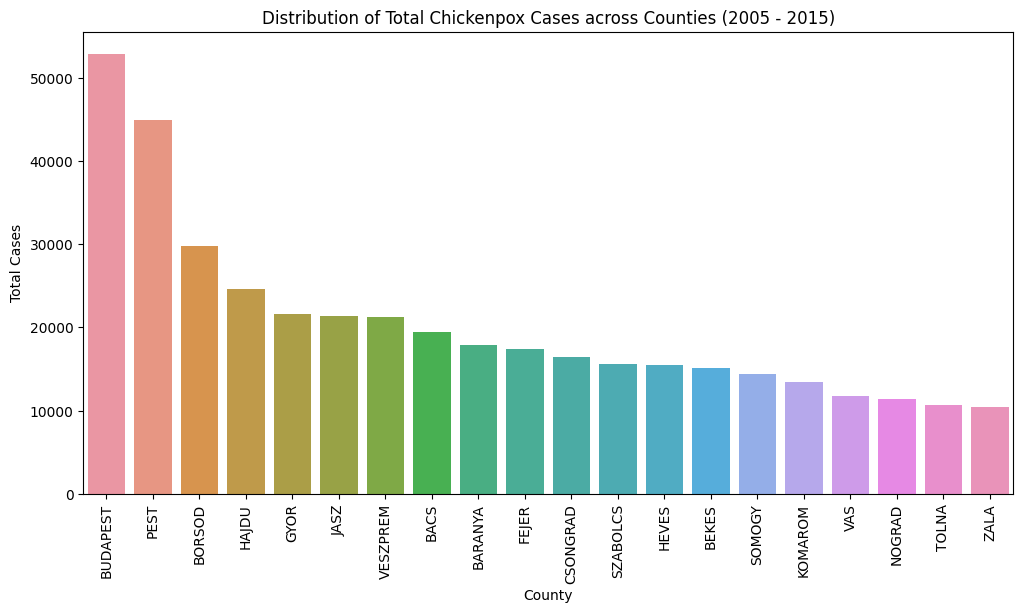

In [63]:
# Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=county_totals.index, y=county_totals.sort_values(ascending=False))
plt.xlabel('County')
plt.ylabel('Total Cases')
plt.title('Distribution of Total Chickenpox Cases across Counties (2005 - 2015)')
plt.xticks(rotation=90)
plt.show()

In [64]:
# Calculate the mean weekly case count per county
mean_weekly_cases_per_county = chickenpox_df.drop(['Date', 'National_Total', 'month', 'Year'], axis=1).mean()

# Sort the county totals in descending order
county_mean_sorted = mean_weekly_cases_per_county.sort_values(ascending=False)

# Create the bar plot
fig = px.bar(x=county_mean_sorted.index, y=county_mean_sorted.values)

# Update the layout
fig.update_layout(
    title='Distribution of the weekly mean Case Count per County',
    xaxis_title='County',
    yaxis_title='Mean Weekly Cases',
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

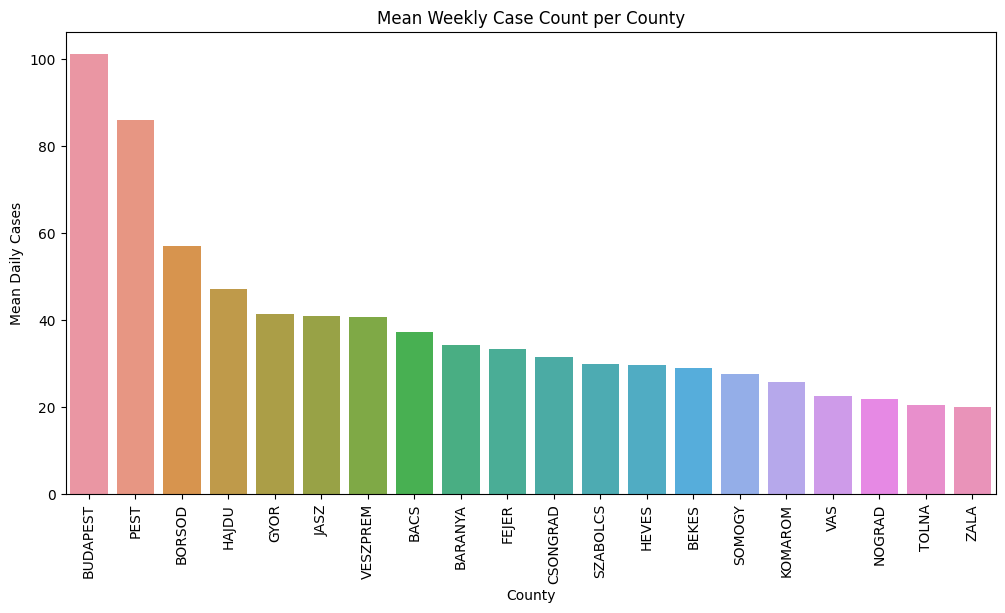

In [65]:
# Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=county_mean_sorted.index, y=county_mean_sorted.values)
plt.title('Mean Weekly Case Count per County')
plt.xlabel('County')
plt.ylabel('Mean Daily Cases')
plt.xticks(rotation=90)
plt.show()

In [66]:
# Mean daily count
national_weekly_mean = chickenpox_df.describe().T['mean'][:-2].sort_values(ascending=False)
national_weekly_mean

National_Total    776.856322
BUDAPEST          101.245211
PEST               86.101533
BORSOD             57.082375
HAJDU              47.097701
GYOR               41.436782
JASZ               40.869732
VESZPREM           40.636015
BACS               37.166667
BARANYA            34.204981
FEJER              33.272031
CSONGRAD           31.488506
SZABOLCS           29.854406
HEVES              29.691571
BEKES              28.911877
SOMOGY             27.609195
KOMAROM            25.643678
VAS                22.467433
NOGRAD             21.850575
TOLNA              20.352490
ZALA               19.873563
Name: mean, dtype: float64

#### Observations:
* `Budapest` has the highest weekly average case counts with a value of 101. This is helped by the fact that it is the most populated county in Hungary being its capotal.
* Followed by `Pest` then `Borsod`.
* The county with the least total and least daily mean count is `Zala`.

### By proportion

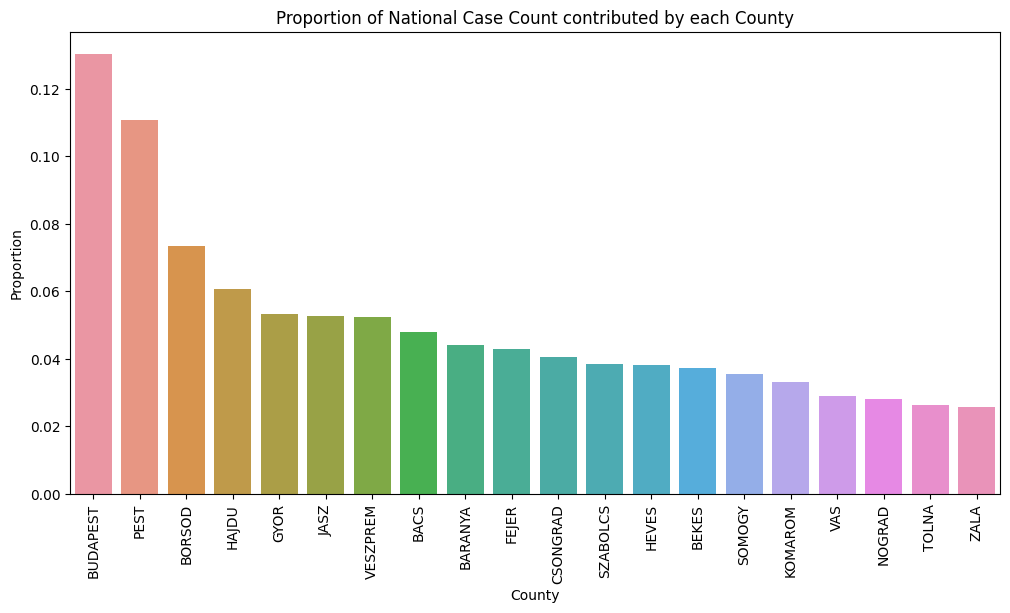

In [67]:
case_count_columns = chickenpox_df.columns.drop(['Date', 'National_Total', 'Year', 'month'])
chickenpox_df[case_count_columns] = chickenpox_df[case_count_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the total national case count
total_cases = chickenpox_df['National_Total'].sum()

# Calculate the proportion of each county's case count
county_proportions = chickenpox_df[case_count_columns].sum() / total_cases

# Sorting in descending order
county_proportions = county_proportions.sort_values(ascending=False)

# Plot the county proportions
plt.figure(figsize=(12, 6))
sns.barplot(x=county_proportions.index, y=county_proportions.values)
plt.xlabel('County')
plt.ylabel('Proportion')
plt.title('Proportion of National Case Count contributed by each County')
plt.xticks(rotation=90)
plt.show()

In [68]:
# Showing the numbers as they are
county_proportions.sort_values(ascending=False)

BUDAPEST    0.130327
PEST        0.110833
BORSOD      0.073479
HAJDU       0.060626
GYOR        0.053339
JASZ        0.052609
VESZPREM    0.052308
BACS        0.047842
BARANYA     0.044030
FEJER       0.042829
CSONGRAD    0.040533
SZABOLCS    0.038430
HEVES       0.038220
BEKES       0.037217
SOMOGY      0.035540
KOMAROM     0.033010
VAS         0.028921
NOGRAD      0.028127
TOLNA       0.026199
ZALA        0.025582
dtype: float64

#### Observations:
Budapest case counts contributes to 13% of the national tally whicg is quite high considering that counties like Zala contribute to just 2% of the national tally.
Generally, the counties with a significantly high percentage of rural population as of 2015 [here](https://en.wikipedia.org/wiki/Ranked_list_of_Hungarian_counties), a threshold of 40% (`Zala, Tolna, Somogy, Nograd and Heves with the exception of Borsod`) each contribute to less than 4% of the national tally.

### Distribution of case counts
> Are they normally distributed?

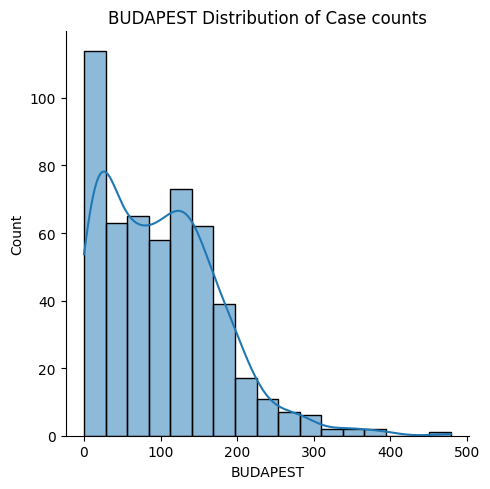

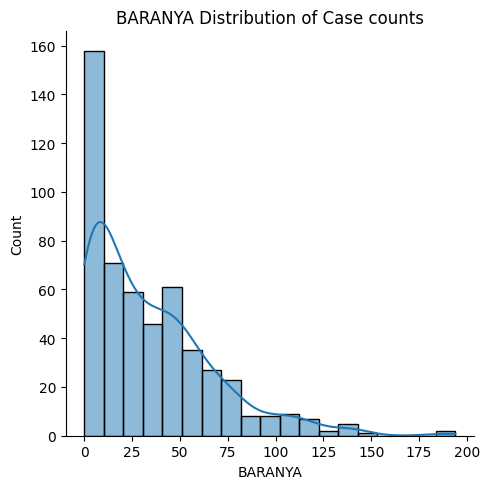

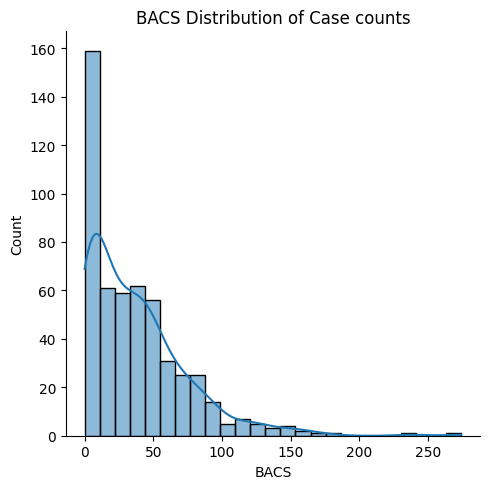

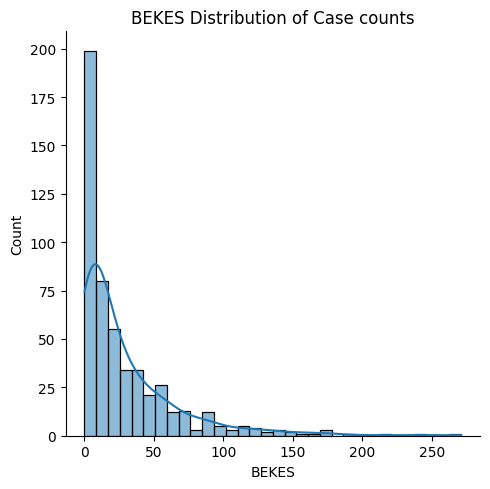

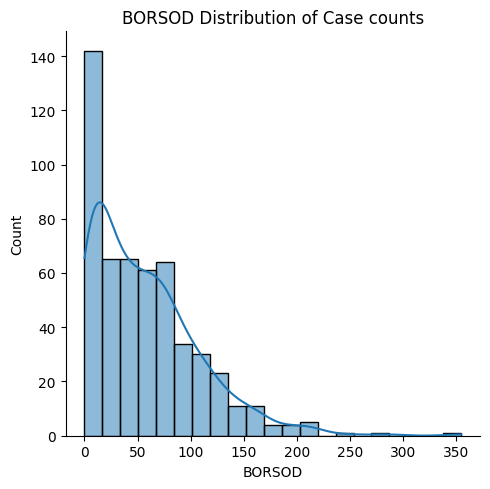

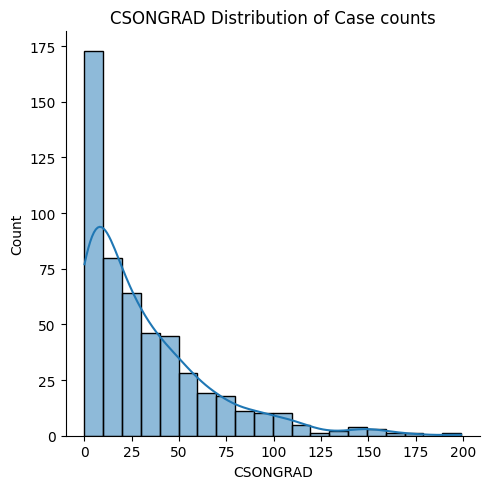

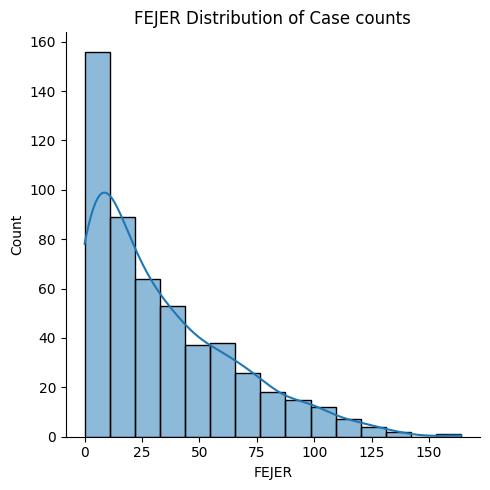

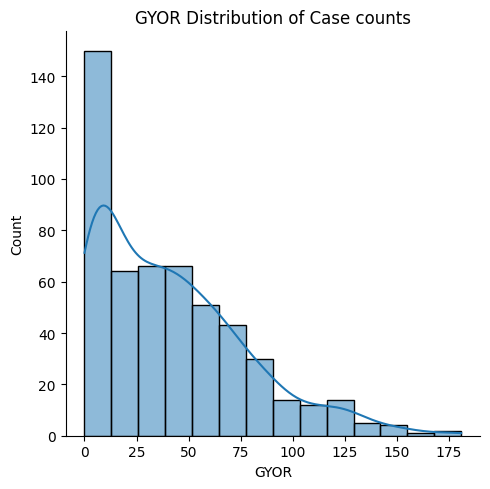

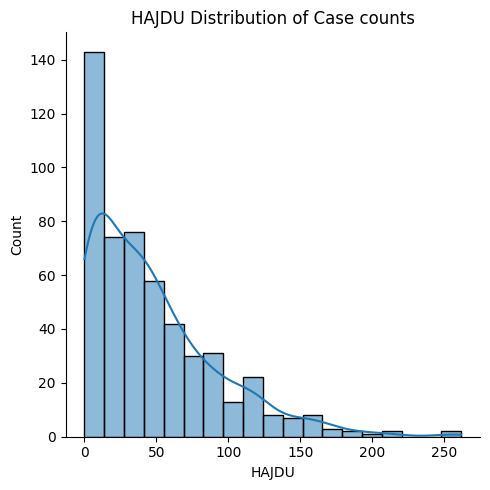

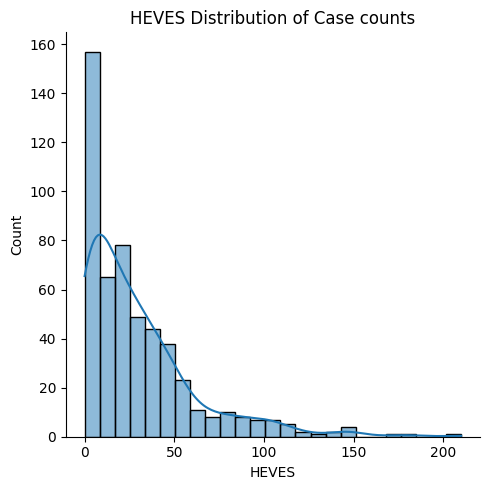

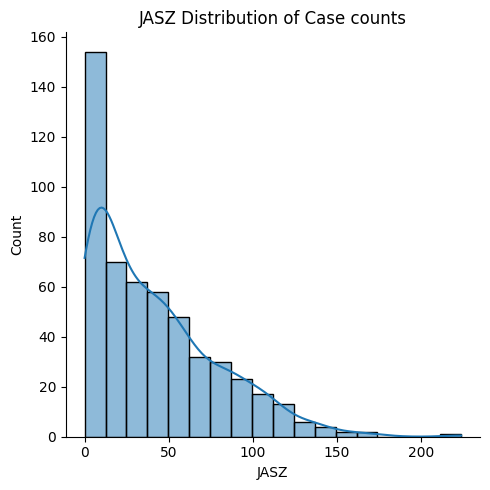

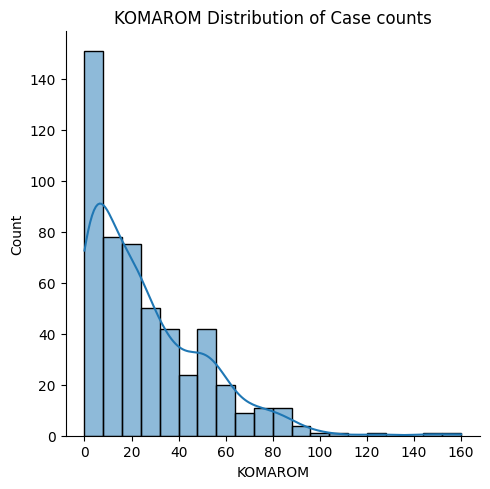

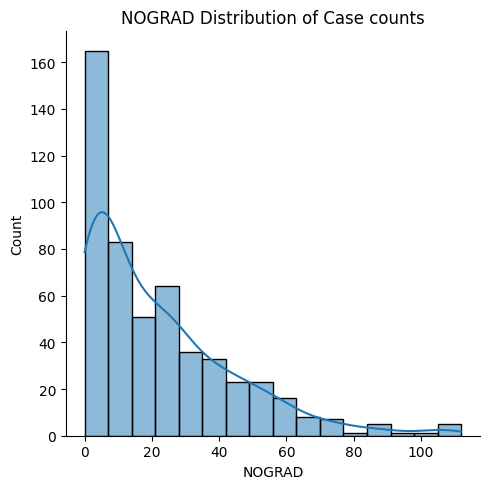

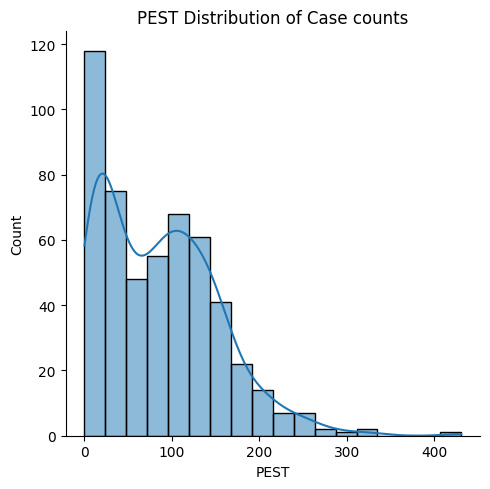

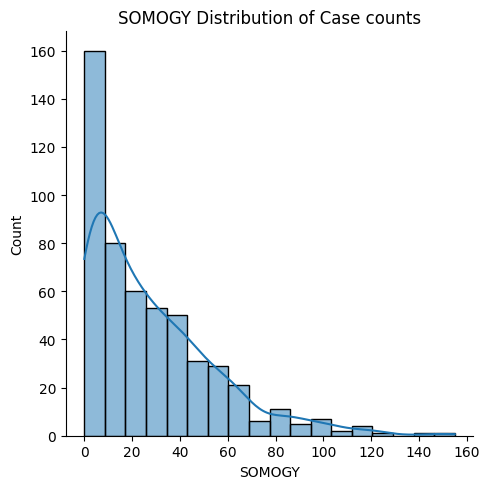

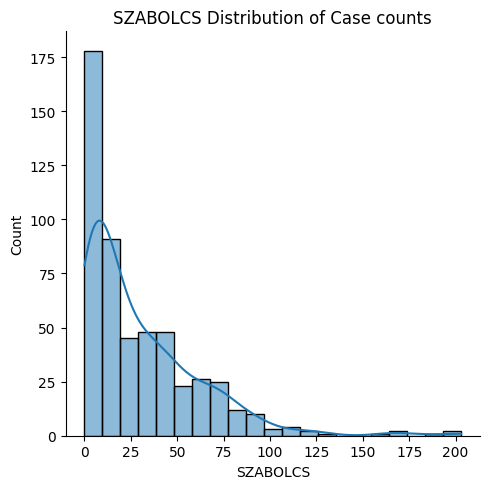

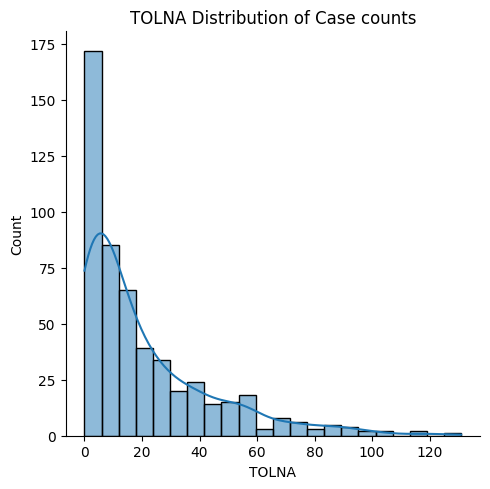

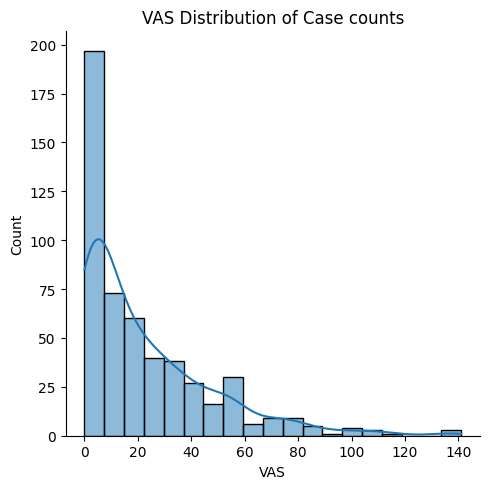

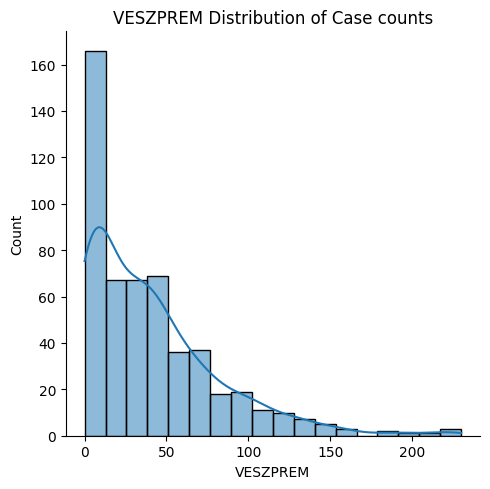

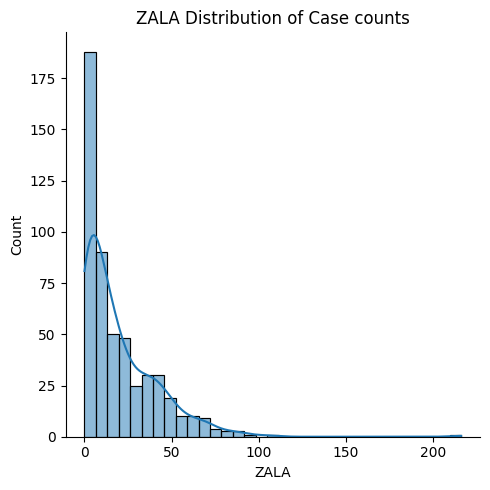

In [69]:
numeric_cols = chickenpox_df.drop(['Year', 'month', 'National_Total', 'Date'], axis = 1).columns

for idx, col in enumerate(numeric_cols):
    sns.displot(data=chickenpox_df, x=col, kde=True)
    plt.title(f"{col} Distribution of Case counts")
    plt.tight_layout()

#### Observations:
* The case counts are not normally distributed thus during modelling, there will be need to scale the data.

### Outliers

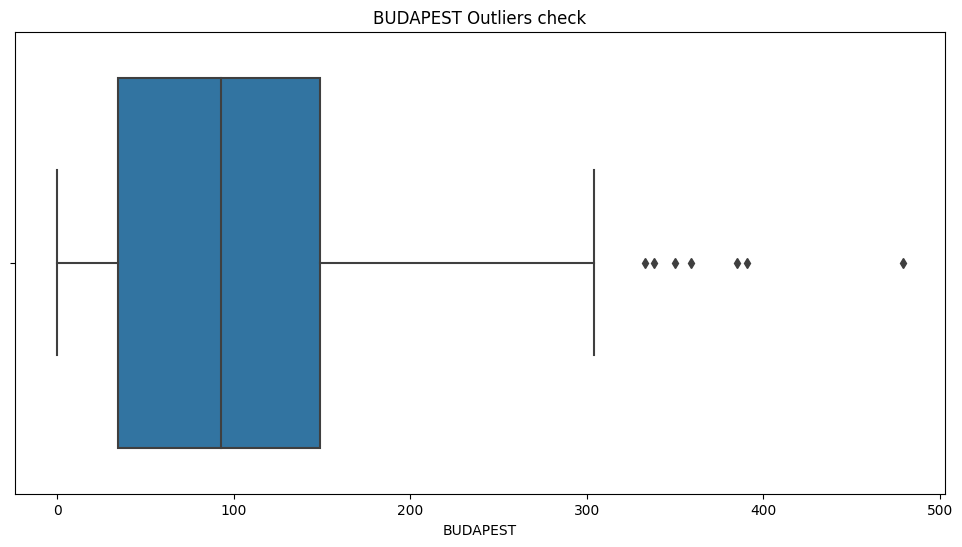

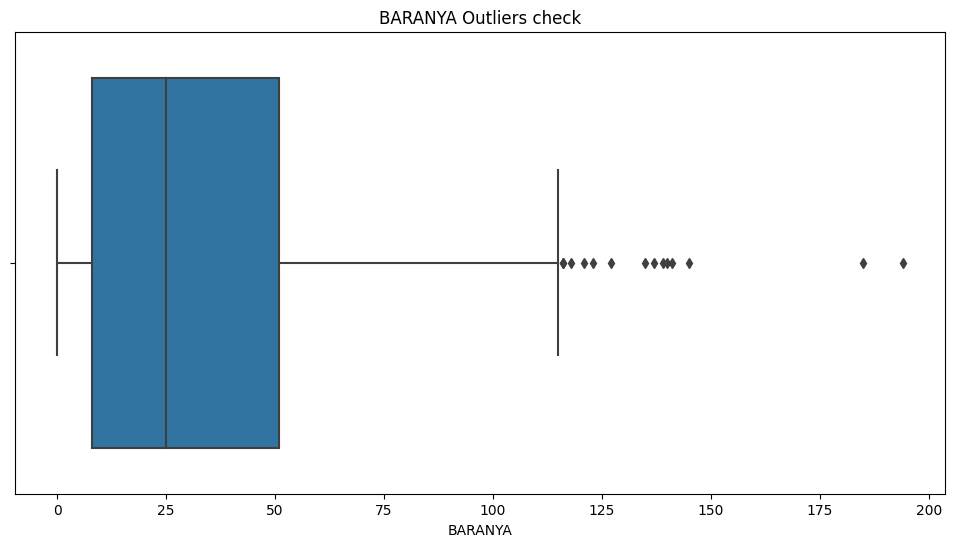

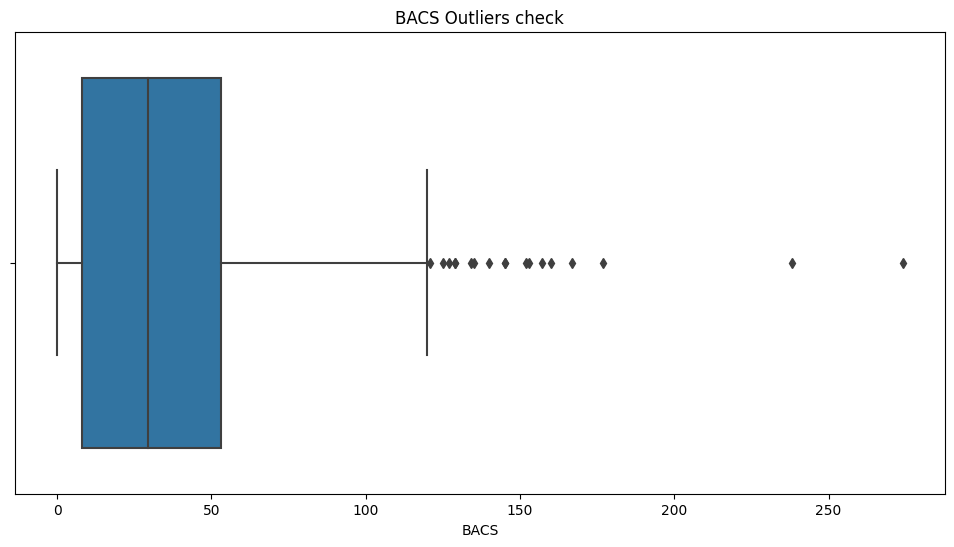

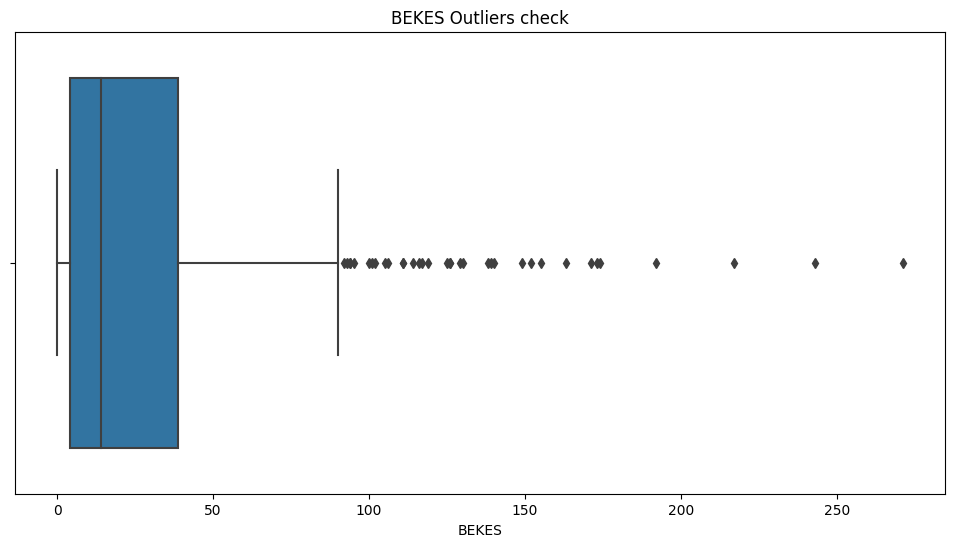

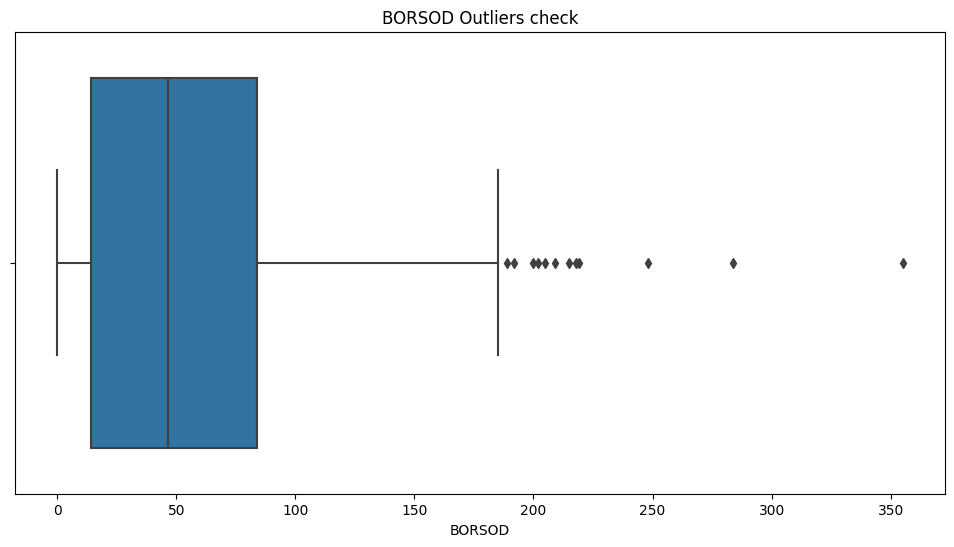

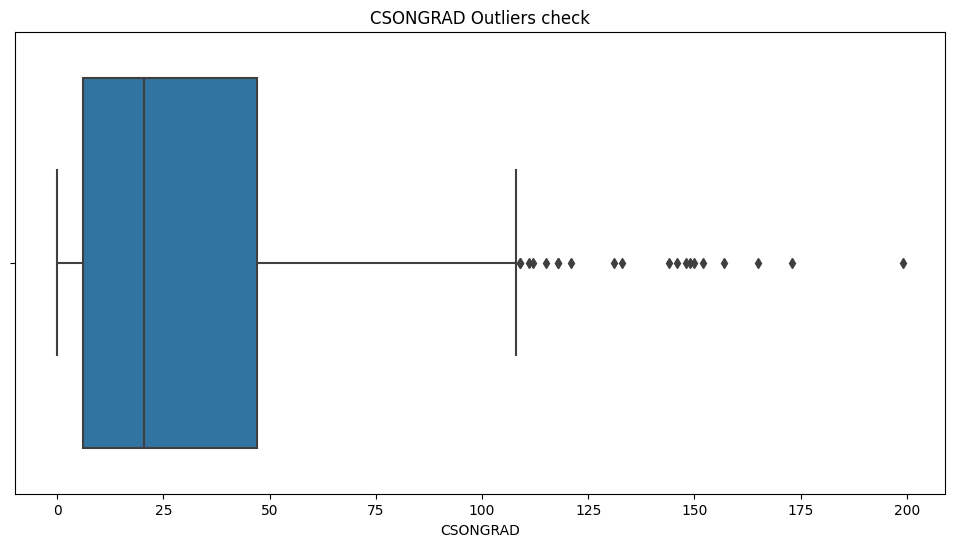

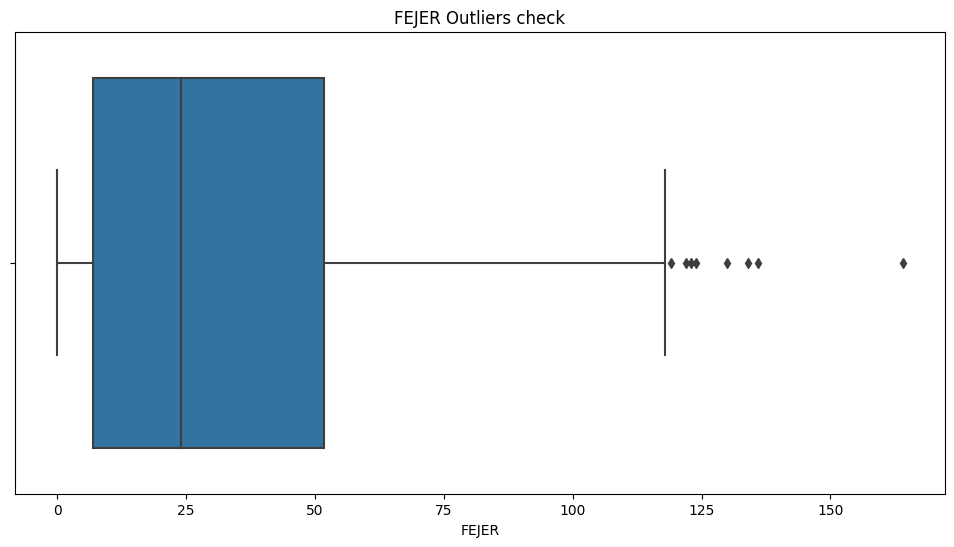

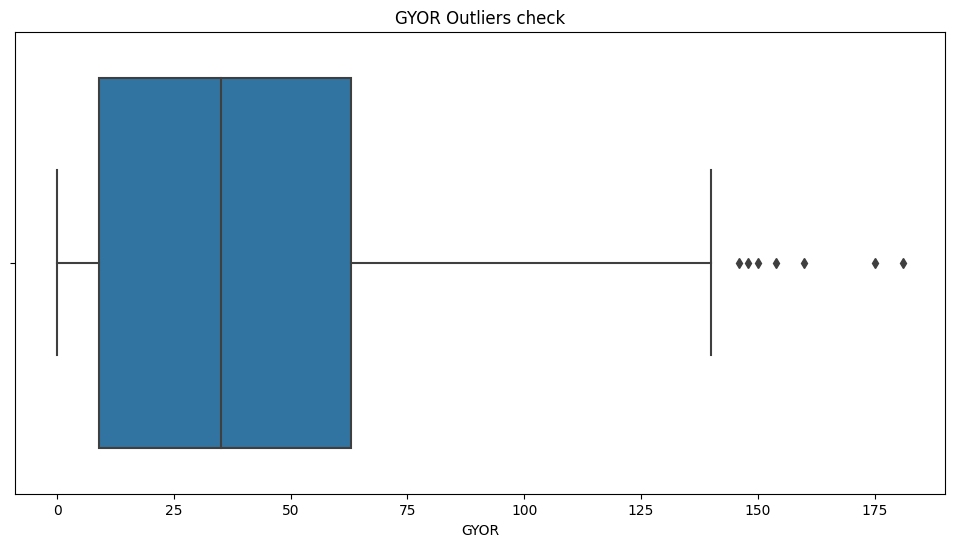

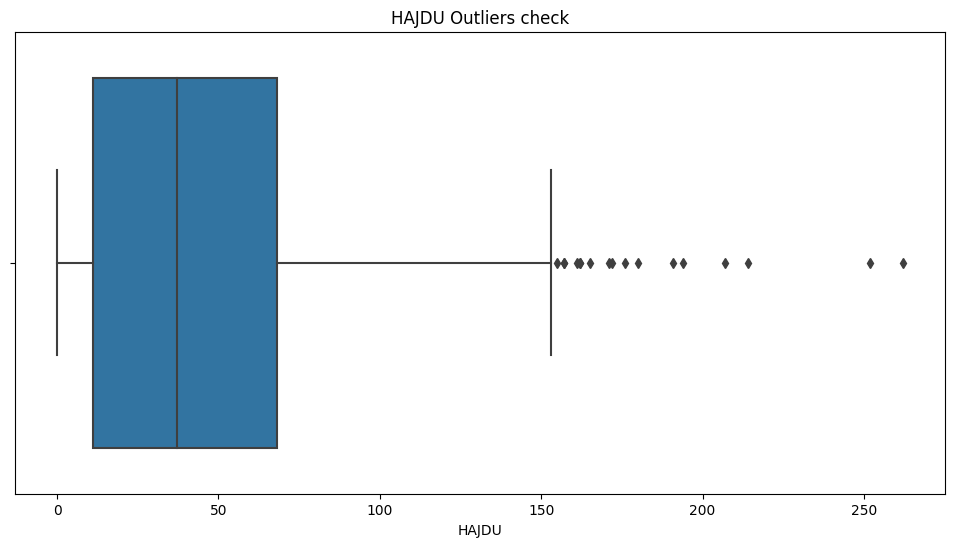

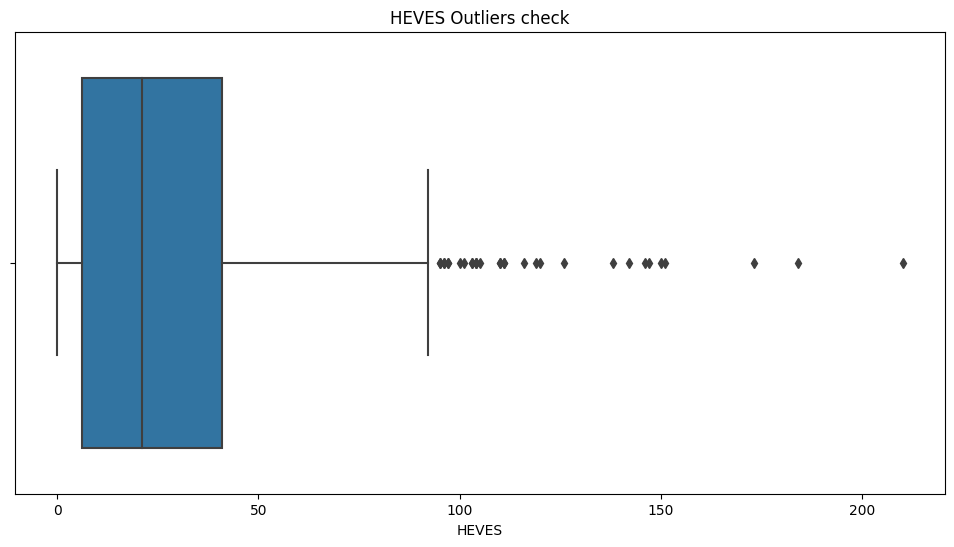

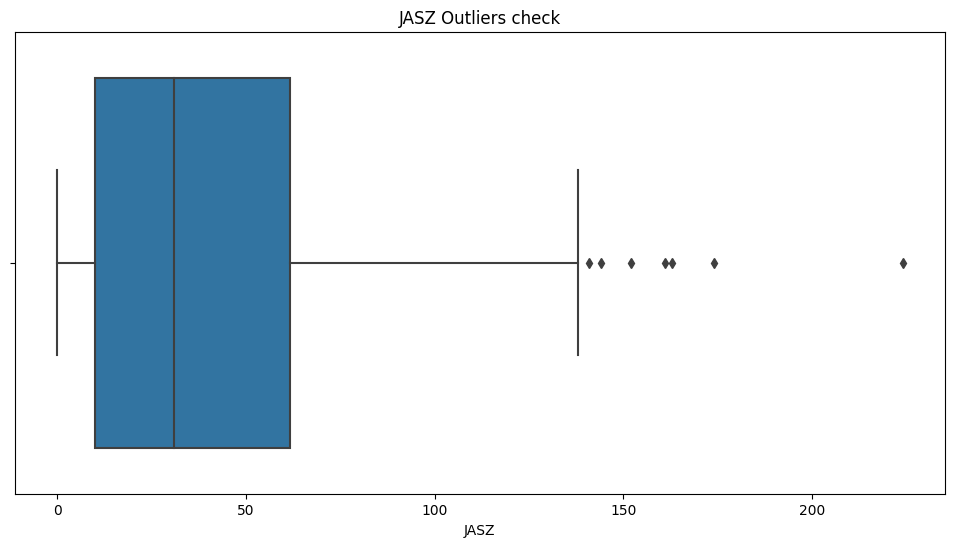

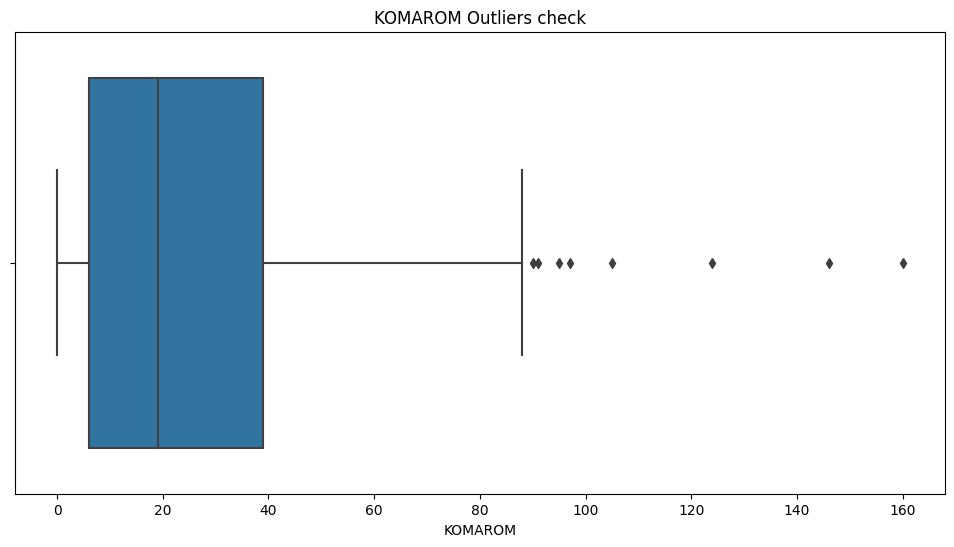

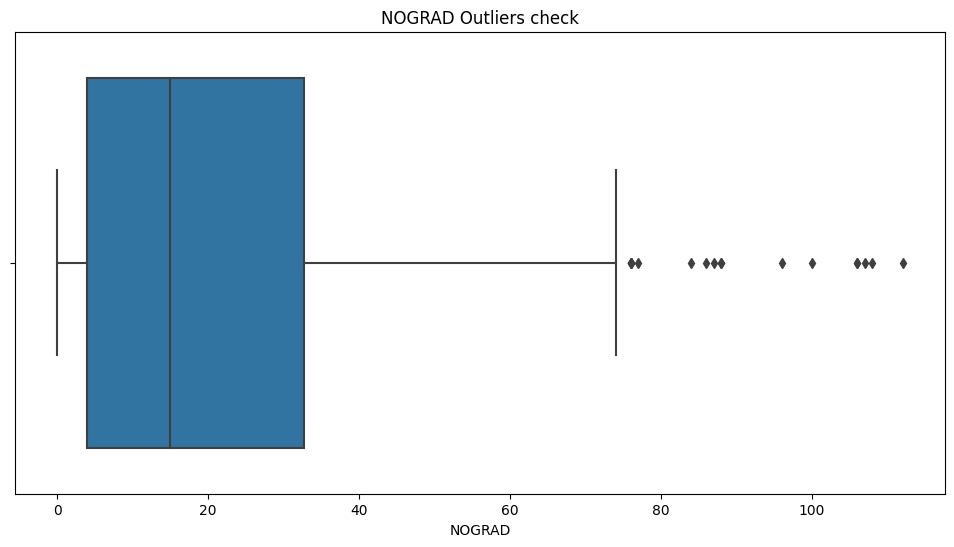

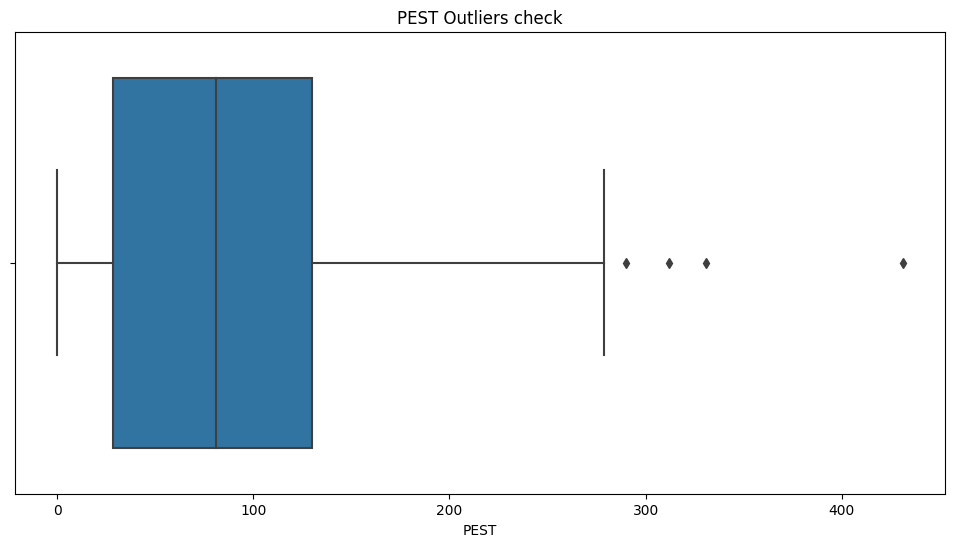

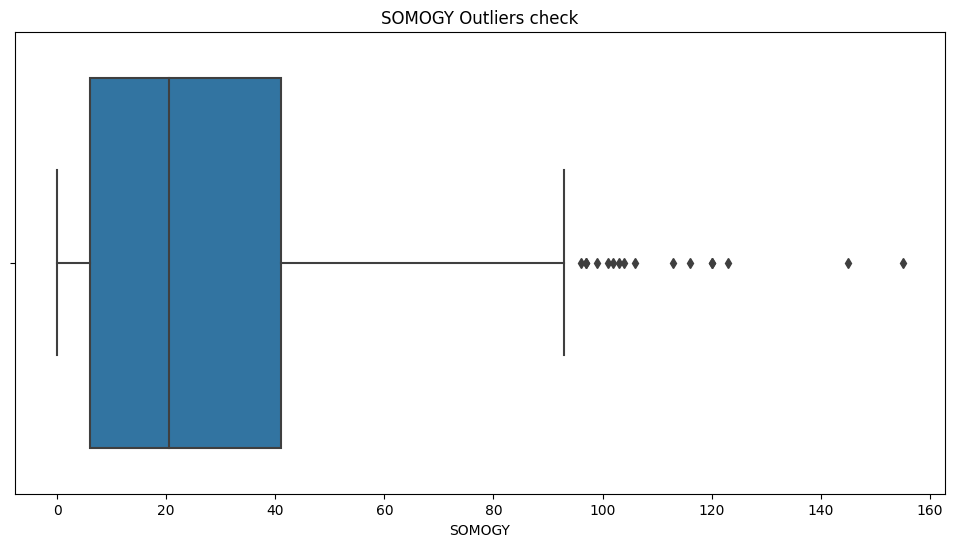

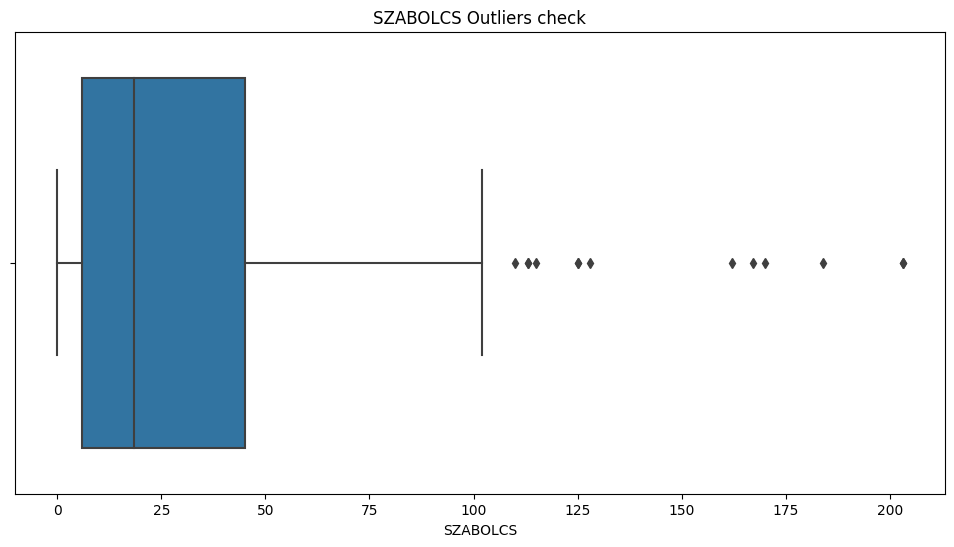

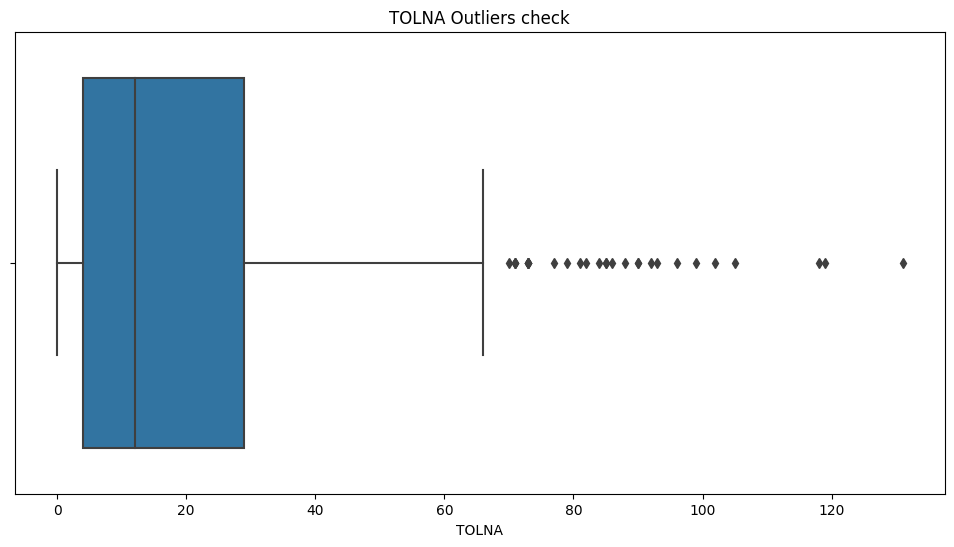

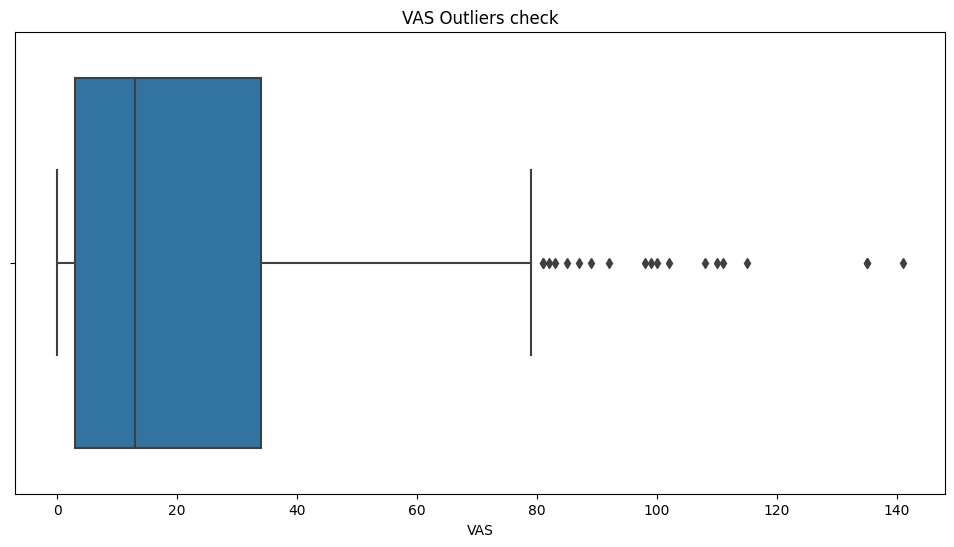

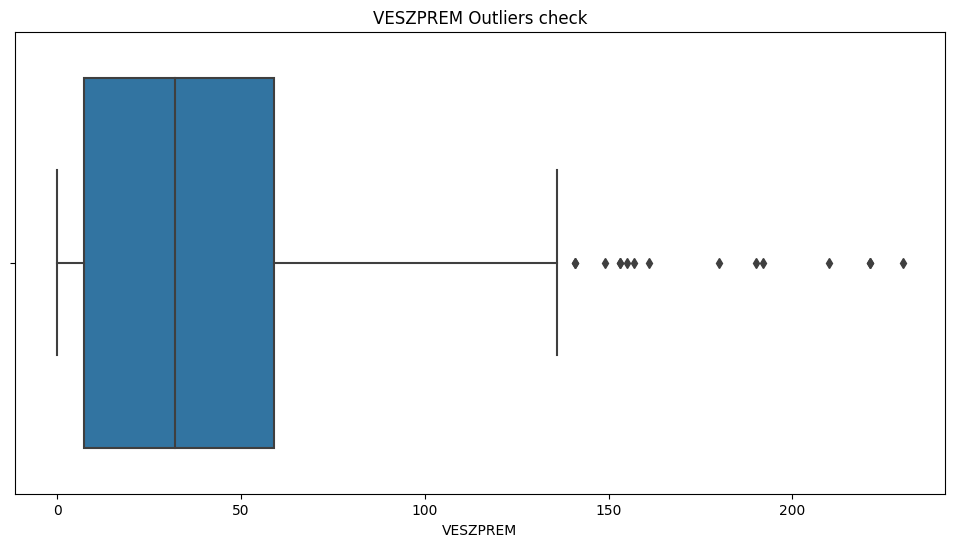

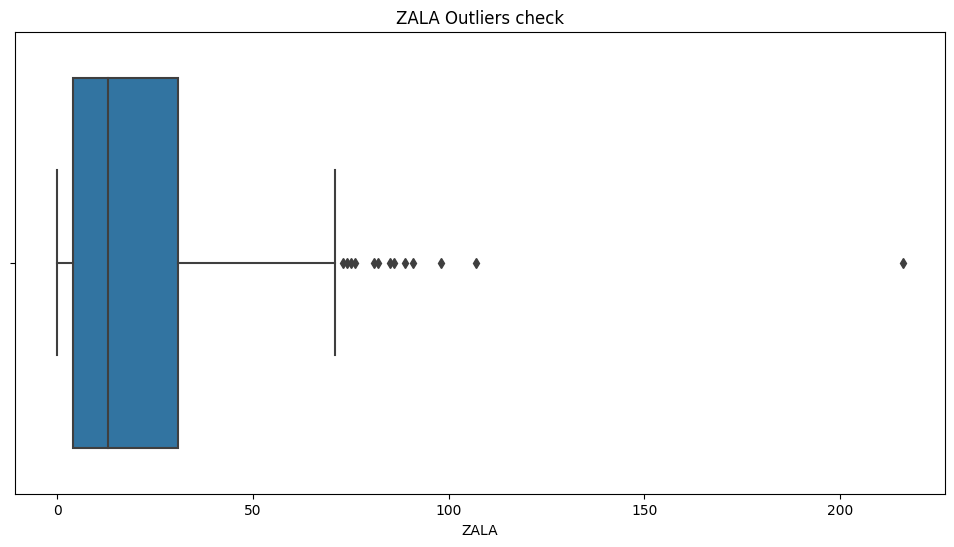

In [70]:
for col in numeric_cols:    
    plt.figure(figsize=(12,6))
    sns.boxplot(x=col,data=chickenpox_df)
    plt.title(f"{col} Outliers check")
    plt.xticks
    plt.show()

There are outliers in this data but the study shall keep them.

## Multivariate Data Analysis
> In this phase the study shall seek to understand the patterns that exist when at least two variables are considered.

The questions to be asked include:
* Are there correlated counties?
* Which year had the most case counts?
* Which month had the most case counts?

### Which year had the most case counts?

In [71]:
# Calculate the sum of cases for each year
yearly_cases = chickenpox_df.groupby('Year').sum()

# We only need the column year
yearly_cases = yearly_cases.drop(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD',
       'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST',
       'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'], axis=1)

# Create the bar plot
fig = go.Figure(data=[
    go.Scatter(x=yearly_cases.index, y=yearly_cases[column], name='year') for column in yearly_cases.columns
])

# Update the layout
fig.update_layout(
    title='Yearly Distribution of National Total Chickenpox Cases',
    xaxis_title='Year',
    yaxis_title='Total Cases'
)

# Show the plot
fig.show()

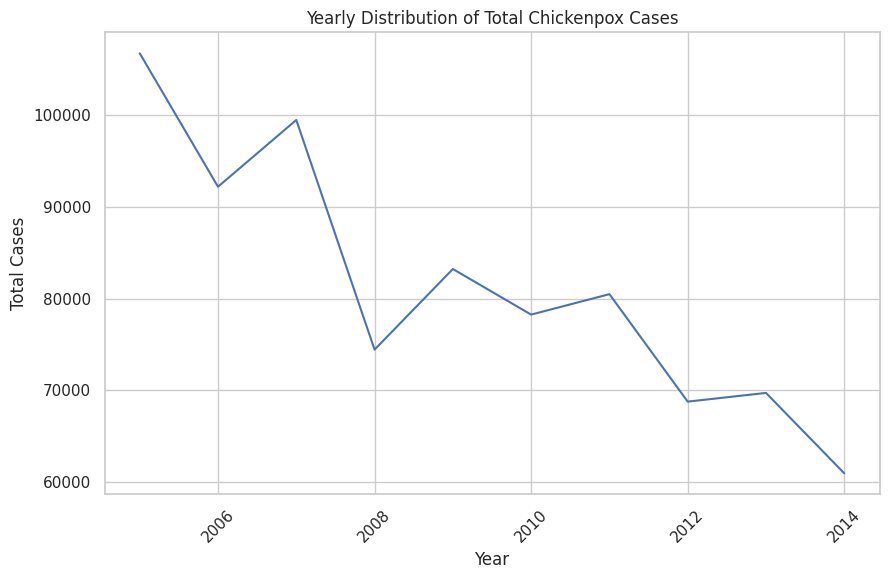

In [72]:
# Aggregate the data on a yearly basis
yearly_totals = chickenpox_df.groupby('Year').sum().sum(axis=1)

# Create a dataframe with the yearly totals
yearly_totals_df = pd.DataFrame({'Year': yearly_totals.index, 'Total Cases': yearly_totals.values})

# Plot the line plot using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_totals_df, x='Year', y='Total Cases')

# Set plot title and labels
plt.title('Yearly Distribution of Total Chickenpox Cases')
plt.xlabel('Year')
plt.ylabel('Total Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [73]:
# Calculate the national total weekly mean case count
national_mean_cases = chickenpox_df['National_Total'].mean()

# Create the line plot
fig = go.Figure(data=[
    go.Scatter(x=chickenpox_df['Date'], y=chickenpox_df['National_Total'], mode='lines', name='Weekly Case Count')
])

# Update the layout
fig.update_layout(
    title='National Total Case Count over time (2005 -2015)',
    xaxis_title='Date',
    yaxis_title='Case Count'
)

# Add a line for the national mean case count
fig.add_trace(go.Scatter(x=chickenpox_df['Date'], y=[national_mean_cases] * len(chickenpox_df),
                         name='National Mean', mode='lines', line=dict(color='red')))

# Show the plot
fig.show()

In [74]:
# Decline percentage
decline_pct = (53213 - 30313)/53213 * 100

print(f"There is a {decline_pct:.2f}% percent in chickenpox cases from 2005 to 2015")

There is a 43.03% percent in chickenpox cases from 2005 to 2015


#### Observations:
* There is a general decline in the case counts of chickenpox.
* In 2005, there was a total of about 53,213 while in 2014 there was a total of about 30,313 cases.
* This represents a decline of about 43.03% which shows that the situation is actually better.
* There is an aspect of seasonality whereby the case count starts to decline around June of every year and reaches its trough in August then in October the case counts start to rise again till it reaches its peak which mostly occurs in April and at times in January.
* The peak period is between April and May and the off-peak period is between August and September.

According to this article that performed a spectral analysis of chicken pox in China in 2017 [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5541728/), the study revealed that for both Hong Kong and Wuhan, there chickenpox infection had two peaks in a year, one being during Spring and the other during Winter and that there exists a positive correlation between the case count and the mean average temperature and rainfall of each city. The study concluded that mean temperature has a significant influence on chickenpox.

The Hungarian data behaves in a similar manner to the findings from the chickenpox study in China in that the peak periods of chickenpox are in Spring and Winter. Spring in Hundary falls during the months of March, April and May. Winter falls during the months of December, January and February according to [Elte University](https://www.elte.hu/en/about-hungary/climate#:~:text=There%20are%20four%20seasons%20in,September%2C%20October%2C%20November)

### Monthly Case counts

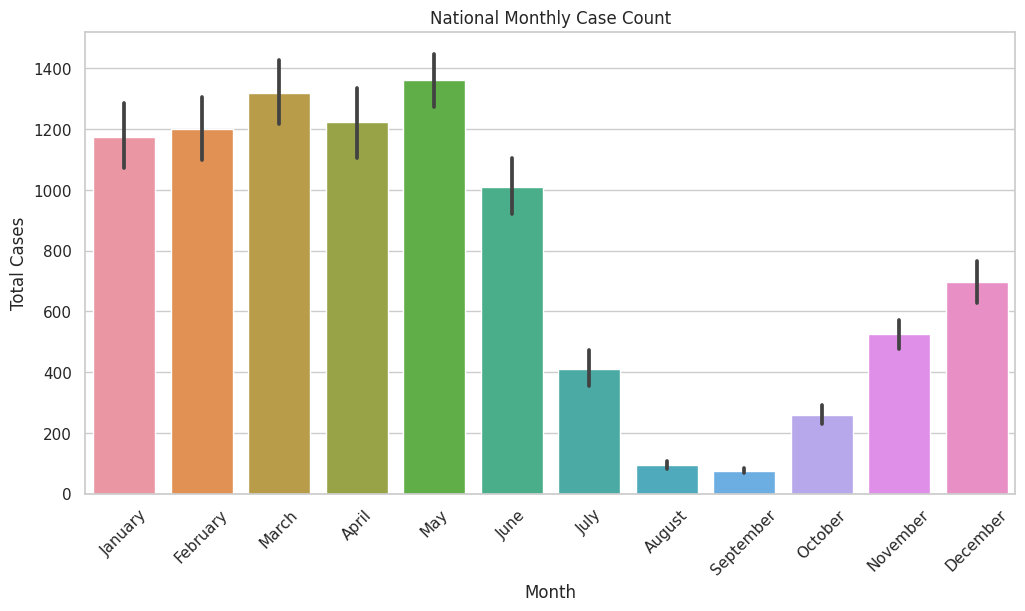

In [75]:
# National monthly
plt.figure(figsize=(12, 6))
sns.barplot(x=chickenpox_df['month'].map(lambda x: calendar.month_name[x]), y=chickenpox_df['National_Total'], data=chickenpox_df)
plt.title('National Monthly Case Count')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Group the data by year and month, and calculate the sum of cases
monthly_cases = chickenpox_df.groupby([chickenpox_df['Date'].dt.year.rename('Year'), chickenpox_df['Date'].dt.month.rename('Month')])['National_Total'].sum().reset_index()

# Map month numbers to month names
monthly_cases['Month'] = monthly_cases['Month'].map(lambda x: calendar.month_name[x])

# Create the bar plot
fig = go.Figure(data=[
    go.Bar(x=monthly_cases['Month'], y=monthly_cases['National_Total'])
])

# Update the layout
fig.update_layout(
    title='National Total Monthly Case Count',
    xaxis_title='Month',
    yaxis_title='Total Cases'
)

# Show the plot
fig.show()

#### Observations:
* The peak period is between April and May and the off-peak period is between August and September.

### Correlation
> Does correlatioin exist among the counties?

> Does Border sharing affect Correlation?

In [77]:
boundary_sharing = {} # Empty dictionary to hold county that share a boundary

# Looping through each county in county list
for county in county_list:
    
    # Finding the bordering counties of each county
    boundary_sharing[county] = county_edge_df.loc[county_edge_df['name_1'] == county, 'name_2'].tolist()

# Preview
boundary_sharing

{'BACS': ['JASZ', 'BACS', 'BARANYA', 'CSONGRAD', 'PEST', 'FEJER', 'TOLNA'],
 'BARANYA': ['BARANYA', 'TOLNA', 'SOMOGY', 'BACS'],
 'BEKES': ['HAJDU', 'BEKES', 'JASZ', 'CSONGRAD'],
 'BORSOD': ['HEVES', 'SZABOLCS', 'HAJDU', 'BORSOD', 'NOGRAD', 'JASZ'],
 'BUDAPEST': ['PEST', 'BUDAPEST'],
 'CSONGRAD': ['JASZ', 'BACS', 'BEKES', 'CSONGRAD'],
 'FEJER': ['FEJER', 'SOMOGY', 'KOMAROM', 'TOLNA', 'BACS', 'PEST', 'VESZPREM'],
 'GYOR': ['VESZPREM', 'KOMAROM', 'GYOR', 'VAS'],
 'HAJDU': ['JASZ', 'HAJDU', 'SZABOLCS', 'BEKES', 'BORSOD'],
 'HEVES': ['NOGRAD', 'JASZ', 'PEST', 'HEVES', 'BORSOD'],
 'JASZ': ['JASZ',
  'CSONGRAD',
  'HEVES',
  'BORSOD',
  'PEST',
  'BEKES',
  'BACS',
  'HAJDU'],
 'KOMAROM': ['GYOR', 'FEJER', 'KOMAROM', 'VESZPREM', 'PEST'],
 'NOGRAD': ['PEST', 'BORSOD', 'HEVES', 'NOGRAD'],
 'PEST': ['NOGRAD',
  'FEJER',
  'BUDAPEST',
  'HEVES',
  'BACS',
  'JASZ',
  'PEST',
  'KOMAROM'],
 'SOMOGY': ['TOLNA', 'VESZPREM', 'BARANYA', 'ZALA', 'SOMOGY', 'FEJER'],
 'SZABOLCS': ['HAJDU', 'BORSOD', 'SZA

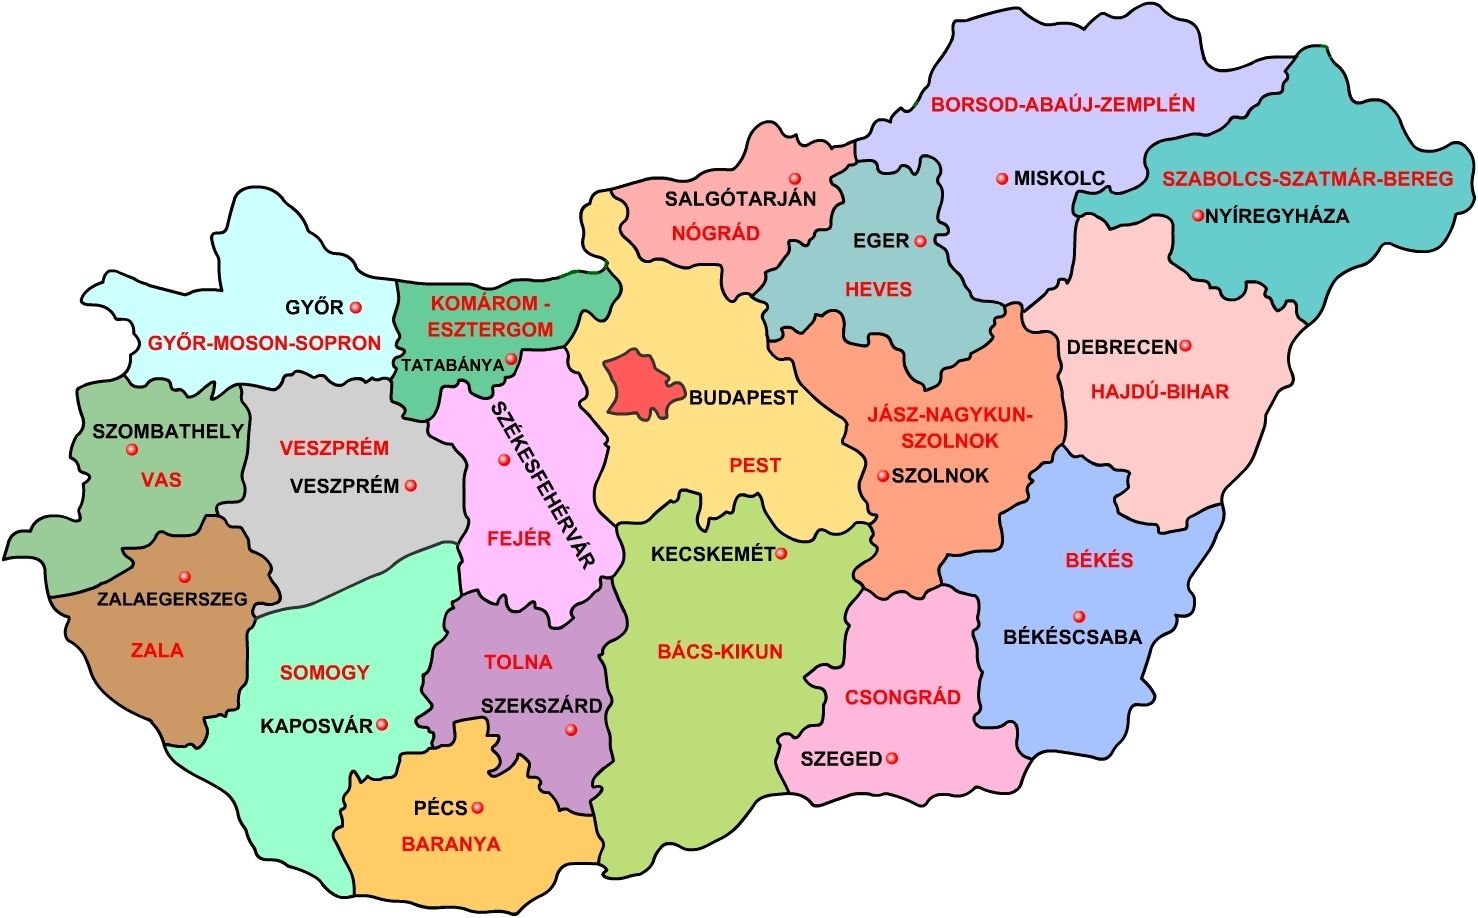

In [78]:
# Showing the map of Hungary
path="/home/teofilo_acholla_ligawa_gafna/Documents/hamoye/mlops/projects/chicken_pox_case_count_prediction/teofizzy/images/hungary.jpg"
display(Image.open(path))

In [79]:
# Looping through the dictionary
for key, val in boundary_sharing.items():
    
    # Accesing the border counties of each county
    for county in val:
        
        # If the key has a similar value in the values, remove the value
        if key == county:
            val.remove(county)
            
boundary_sharing

{'BACS': ['JASZ', 'BARANYA', 'CSONGRAD', 'PEST', 'FEJER', 'TOLNA'],
 'BARANYA': ['TOLNA', 'SOMOGY', 'BACS'],
 'BEKES': ['HAJDU', 'JASZ', 'CSONGRAD'],
 'BORSOD': ['HEVES', 'SZABOLCS', 'HAJDU', 'NOGRAD', 'JASZ'],
 'BUDAPEST': ['PEST'],
 'CSONGRAD': ['JASZ', 'BACS', 'BEKES'],
 'FEJER': ['SOMOGY', 'KOMAROM', 'TOLNA', 'BACS', 'PEST', 'VESZPREM'],
 'GYOR': ['VESZPREM', 'KOMAROM', 'VAS'],
 'HAJDU': ['JASZ', 'SZABOLCS', 'BEKES', 'BORSOD'],
 'HEVES': ['NOGRAD', 'JASZ', 'PEST', 'BORSOD'],
 'JASZ': ['CSONGRAD', 'HEVES', 'BORSOD', 'PEST', 'BEKES', 'BACS', 'HAJDU'],
 'KOMAROM': ['GYOR', 'FEJER', 'VESZPREM', 'PEST'],
 'NOGRAD': ['PEST', 'BORSOD', 'HEVES'],
 'PEST': ['NOGRAD', 'FEJER', 'BUDAPEST', 'HEVES', 'BACS', 'JASZ', 'KOMAROM'],
 'SOMOGY': ['TOLNA', 'VESZPREM', 'BARANYA', 'ZALA', 'FEJER'],
 'SZABOLCS': ['HAJDU', 'BORSOD'],
 'TOLNA': ['SOMOGY', 'BACS', 'BARANYA', 'FEJER'],
 'VAS': ['ZALA', 'GYOR', 'VESZPREM'],
 'VESZPREM': ['KOMAROM', 'ZALA', 'GYOR', 'FEJER', 'VAS', 'SOMOGY'],
 'ZALA': ['VAS', 'S

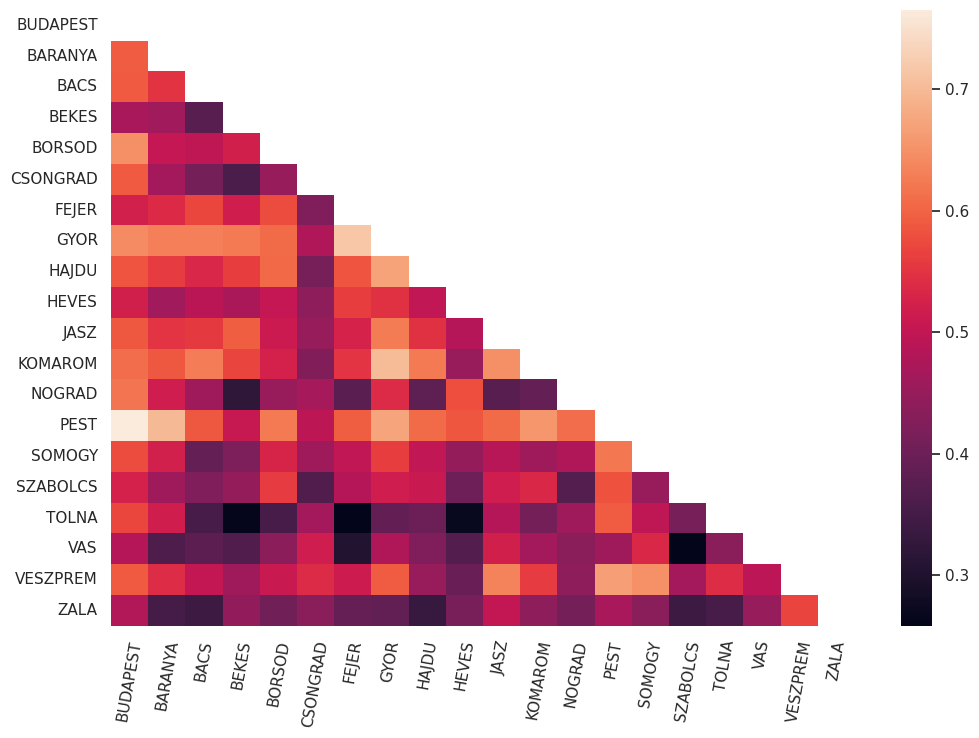

In [80]:
data_matrix = chickenpox_df.drop(['Date', 'National_Total', 'month', 'Year'], axis=1)

data_corr = data_matrix.corr()
# Creating the mask
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# Plotting the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data_corr, annot= False, mask=mask)
plt.xticks(rotation=80)
plt.show()

In [81]:
county_corr = data_matrix.corr().abs().stack().reset_index().sort_values(0, ascending = False)
county_corr['pairs'] = list(zip(county_corr['level_0'], county_corr['level_1']))
county_corr.set_index(['pairs'], inplace = True)

#dropping the level_i columns
county_corr.drop(columns = ['level_0', 'level_1'], inplace = True)

#add correlation column
county_corr.columns = ['cc']

#dropping duplicates
county_corr.drop_duplicates(inplace = True)

#correlations over .75, but less than 1. = multicollinarity
county_corr[(county_corr['cc'] > 0.6) & (county_corr['cc'] < 1)]

cc
pairs                        
(PEST, BUDAPEST)     0.765108
(FEJER, GYOR)        0.716062
(GYOR, KOMAROM)      0.700550
(PEST, BARANYA)      0.698257
(PEST, GYOR)         0.673638
(GYOR, HAJDU)        0.671937
(VESZPREM, PEST)     0.665890
(PEST, KOMAROM)      0.654311
(SOMOGY, VESZPREM)   0.649248
(BORSOD, BUDAPEST)   0.647637
(JASZ, KOMAROM)      0.647520
(BUDAPEST, GYOR)     0.642558
(JASZ, VESZPREM)     0.633663
(GYOR, BACS)         0.629479
(BARANYA, GYOR)      0.629203
(KOMAROM, BACS)      0.627695
(GYOR, JASZ)         0.625258
(PEST, BORSOD)       0.623924
(KOMAROM, HAJDU)     0.623411
(GYOR, BEKES)        0.622800
(SOMOGY, PEST)       0.621598
(NOGRAD, BUDAPEST)   0.617466
(BUDAPEST, KOMAROM)  0.610660
(PEST, NOGRAD)       0.609349
(HAJDU, PEST)        0.608544
(JASZ, PEST)         0.607870
(GYOR, BORSOD)       0.607373
(HAJDU, BORSOD)      0.606355

#### Observations:
There exists a fairly high correlation between some counties that share a border with each other for example, `PEST~BUDAPEST` and `GYOR~KOMAROM`.

## Time Series Analysis

### Counties
> Performing a county by county analysis

### Seasonality

In [82]:
temporal_df = chickenpox_df.drop(['National_Total', 'Year', 'month'], axis=1)
spatial_df = county_edge_df

In [83]:
def index_date(df):
    """ Ensures that the index of the data is the date column

    Args:
        df (_pandas dataframe_): _data frame_

    Returns:
        _pandas dataframe_: _data frame_
    """
    if isinstance(df.index, pd.DatetimeIndex):
        df.index.name = 'Date'
        
    else:
        df.rename(columns={'index':'Date'}, inplace=True)
        df.set_index('Date', inplace=True)
        
    return df

In [84]:
# Indexing the data
temporal_df = index_date(temporal_df)

# preview
temporal_df.head()

BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
Date                                                                        
2005-01-03       168       79    30    173     169        42    136   120   
2005-01-10       157       60    30     92     200        53     51    70   
2005-01-17        96       44    31     86      93        30     93    84   
2005-01-24       163       49    43    126      46        39     52   114   
2005-01-31       122       78    53     87     103        34     95   131   

            HAJDU  HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  \
Date                                                                      
2005-01-03    162     36   130       57       2   178      66        64   
2005-01-10     84     28    80       50      29   141      48        29   
2005-01-17    191     51    64       46       4   157      33        33   
2005-01-24    107     42    63       54      14   107      66        50   
2005-01-31    172     40    61       49      11   124      63        56   

            TOLNA  VAS  VESZPREM  ZALA  
Date                                    
2005-01-03     11   29        87    68  
2005-01-10     58   53        68    26  
2005-01-17     24   18        62    44  
2005-01-24     25   21        43    31  
2005-01-31      7   47        85    60

In [85]:
# Group the time series into monthly buckets
temporal_monthly = temporal_df.resample('MS')

# Take the mean of each group 
temporal_monthly_mean = temporal_monthly.mean()

# Display the first 10 elements of resulting time series
temporal_monthly_mean.head(10)

BUDAPEST  BARANYA    BACS   BEKES  BORSOD  CSONGRAD   FEJER  \
Date                                                                      
2005-01-01    141.20    62.00   37.40  112.80  122.20     39.60   85.40   
2005-02-01    140.25    84.75   63.00  172.25  141.75     53.00  100.75   
2005-03-01    123.00    69.25   89.75  212.50  133.00     60.25   82.75   
2005-04-01    122.00    65.00   81.25  117.00  112.50     52.25   74.00   
2005-05-01    133.20    70.80  108.00  104.00   97.80     36.00   80.00   
2005-06-01    133.75    56.00  117.50   60.50   99.25     28.75   59.25   
2005-07-01     77.50    14.25   30.75   15.25   37.75     16.50   20.75   
2005-08-01     25.00     2.00    6.00    3.40    3.60      3.60    3.40   
2005-09-01      8.75     2.25    4.75    2.00   16.75      2.00    1.75   
2005-10-01     21.60     7.80   17.00    9.40   42.40      7.80   21.20   

              GYOR   HAJDU  HEVES    JASZ  KOMAROM  NOGRAD    PEST  SOMOGY  \
Date                                                                         
2005-01-01  103.80  143.20  39.40   79.60    51.20   12.00  141.40   55.20   
2005-02-01  144.75  154.50  51.00   90.50    67.25   17.25  138.75   87.25   
2005-03-01  125.25  120.75  38.25   96.50    79.50   12.50  136.50   58.50   
2005-04-01  112.25  155.25  49.25  123.50    59.75   16.25  132.00   50.75   
2005-05-01  129.00  132.40  91.60  138.20    90.00   40.00  139.40   49.20   
2005-06-01   90.50  111.50  58.50  116.75    98.00   27.00  104.25   21.00   
2005-07-01   39.50   50.25  23.75   48.25    42.00    7.75   42.50    9.75   
2005-08-01    7.40    8.00   4.40    8.00     6.60    1.80   16.20    3.60   
2005-09-01    2.75    3.50   2.75    6.25     4.00    3.25   12.50    3.50   
2005-10-01    7.60   22.80  14.60   17.00    28.60   11.00   60.80    7.60   

            SZABOLCS  TOLNA    VAS  VESZPREM   ZALA  
Date                                                 
2005-01-01     46.40  25.00  33.60     69.00  45.80  
2005-02-01     72.50  18.50  49.25    113.00  56.50  
2005-03-01     82.25  30.00  58.50    101.00  42.25  
2005-04-01     55.75  13.00  65.00     79.50  28.25  
2005-05-01     46.80  21.20  59.60     79.60  35.40  
2005-06-01     57.75  28.00  36.50     67.75  43.00  
2005-07-01     36.75   9.75  27.50     30.50  16.00  
2005-08-01      5.80   2.40   7.20      5.20   2.20  
2005-09-01      4.25   3.75   2.75      3.00   4.75  
2005-10-01      8.40   5.20  36.00     24.40  14.40

In [86]:
# check for missing values
temporal_monthly_mean.isna().sum()

BUDAPEST    0
BARANYA     0
BACS        0
BEKES       0
BORSOD      0
CSONGRAD    0
FEJER       0
GYOR        0
HAJDU       0
HEVES       0
JASZ        0
KOMAROM     0
NOGRAD      0
PEST        0
SOMOGY      0
SZABOLCS    0
TOLNA       0
VAS         0
VESZPREM    0
ZALA        0
dtype: int64

In [87]:
temporal_monthly_mean.columns

Index(['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER',
       'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY',
       'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'],
      dtype='object')

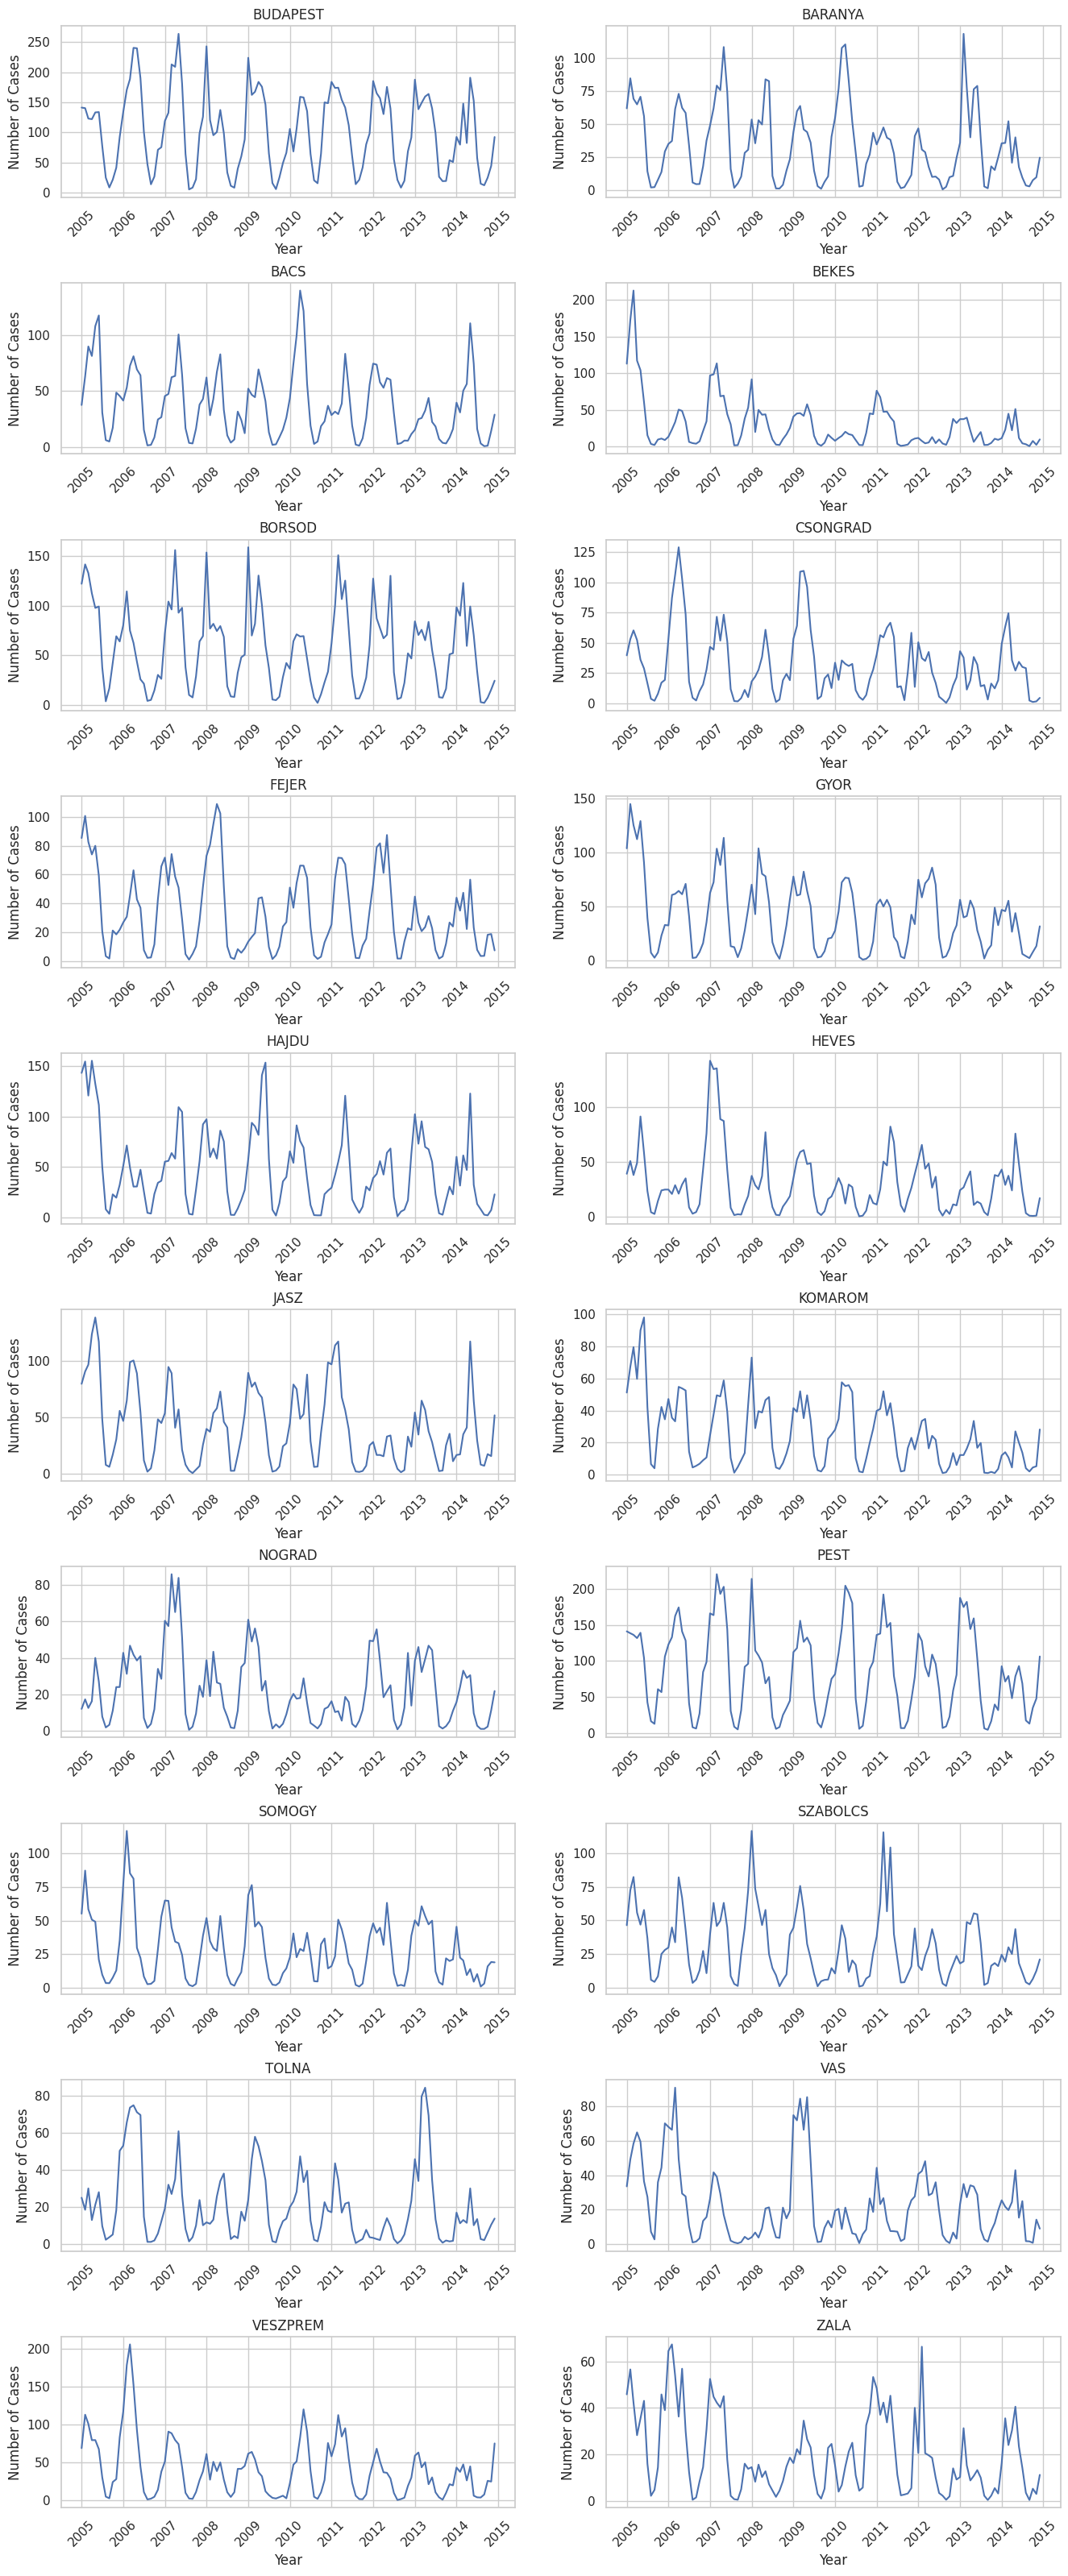

In [88]:
# Calculate the number of rows and columns for subplots
num_rows = (len(temporal_monthly_mean.columns) + 1) // 2  # Round up to the nearest integer
num_cols = min(len(temporal_monthly_mean.columns), 2)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Plot the time series for each column in subplots
for i, column in enumerate(temporal_monthly_mean.columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col] if num_rows > 1 else axes[col]  # Handle single row case
    ax.plot(temporal_monthly_mean.index, temporal_monthly_mean[column])
    ax.set_title(column)
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Cases')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove empty subplots if the number of columns is not a multiple of 4
if len(temporal_monthly_mean.columns) % 4 != 0:
    for i in range(len(temporal_monthly_mean.columns), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

# Display the plot
plt.show()

#### Observations:
There is an aspect of seasonality in most of the counties, whereby the number of cases peaks during some months and falls off in other months.
The first peak is during the first few months of the year between January to June, where the highest is around May then it begins to fall off in June and reaches the lowest period between August and September. The reasons for this had already been mentioned earlier.

### Testing for Trends

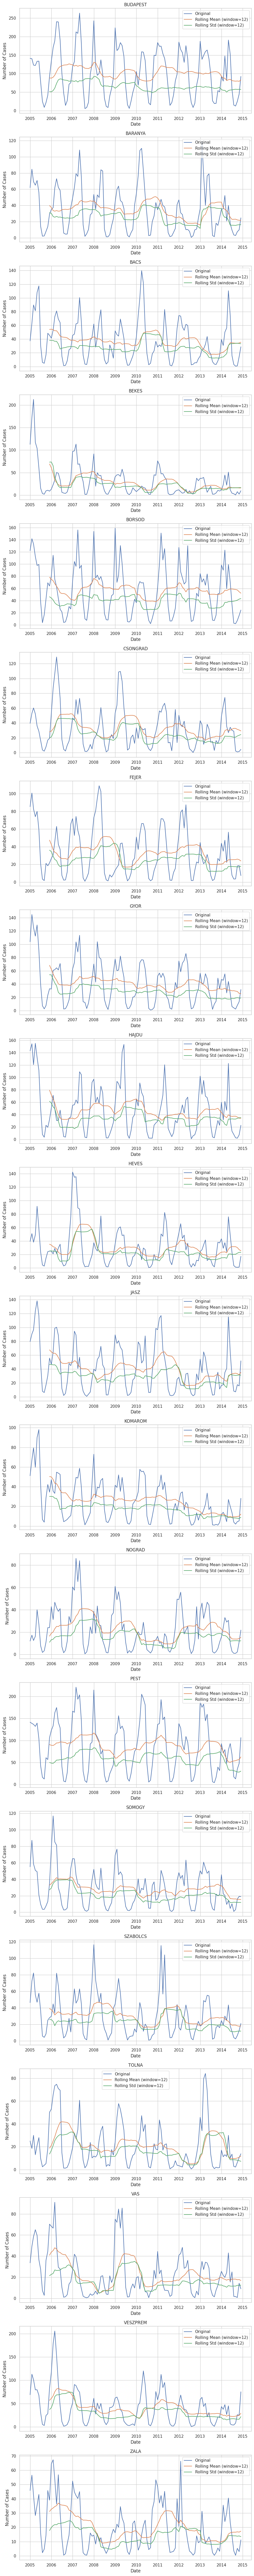

In [89]:
# Calculate rolling statistics for each column
rolling_mean = temporal_monthly_mean.rolling(window=12).mean()  # Rolling mean with window size of 12
rolling_std = temporal_monthly_mean.rolling(window=12).std()  # Rolling standard deviation with window size of 12

# Plot the original data and rolling statistics for each column
fig, axes = plt.subplots(nrows=len(temporal_df.columns), ncols=1, figsize=(10, 5 * len(temporal_df.columns)))

for i, column in enumerate(temporal_monthly_mean.columns):
    ax = axes[i] if len(temporal_monthly_mean.columns) > 1 else axes
    ax.plot(temporal_monthly_mean.index, temporal_monthly_mean[column], label='Original')
    ax.plot(rolling_mean.index, rolling_mean[column], label='Rolling Mean (window=12)')
    ax.plot(rolling_std.index, rolling_std[column], label='Rolling Std (window=12)')
    ax.set_title(column)
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of Cases')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

#### Observations:
* The rolling mean of most plots generally exhibit a downward trend, implying that for most of the counties, the number of cases has been decreasing over time.
* The rolling standard deviation of some plots exhibit a pattern of seasonality. This shows that there is seasonality in the data

In [90]:
def stationarity_check(TS, w:int):
    """_Performing an augmented dickey fuller test to check for stationarity_

    Args:
        TS (_type_): _time series data frame_
        w (int): _window(lag periods)_

    Returns:
        _conclusion_:  str__
    """
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=w, center=False).mean()
    roll_std = TS.rolling(window=w, center=False).std()

    # Perform the Dickey Fuller test
    dftest = adfuller(TS)

    # Plot rolling statistics
    fig = plt.figure(figsize=(12, 6))
    orig = plt.plot(TS, color='blue', label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

    print()
    
    # Initialize an empty string

    # Hypothesis testing
    if dfoutput['p-value'] >= dfoutput['Critical Value (5%)']:
        conclusion = 'The data is non-stationary'
    else:
        conclusion = 'The data is stationary'
        
    return conclusion

Checking stationarity for column: BUDAPEST


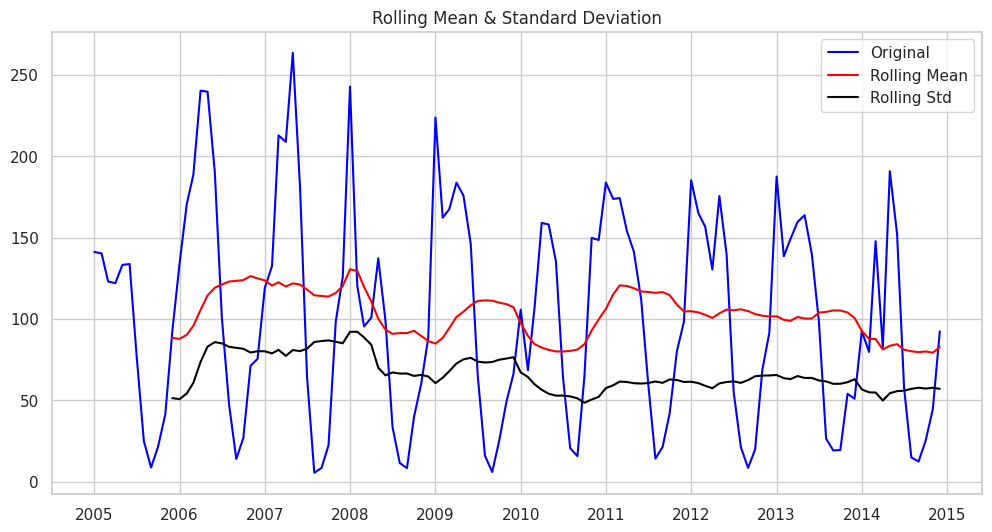

Results of Dickey-Fuller Test: 

Test Statistic                  -3.147497
p-value                          0.023232
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: BARANYA


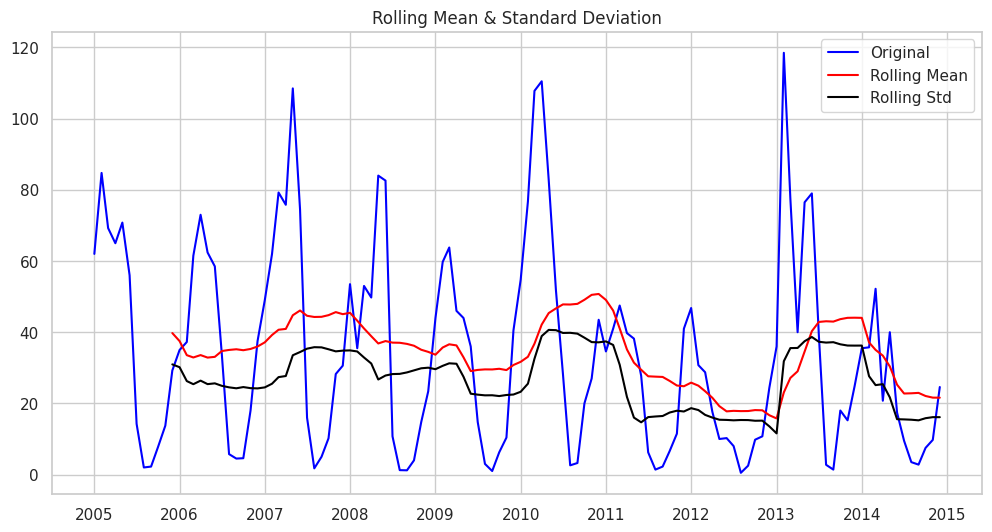

Results of Dickey-Fuller Test: 

Test Statistic                -6.680967e+00
p-value                        4.343380e-09
#Lags Used                     5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64

Checking stationarity for column: BACS


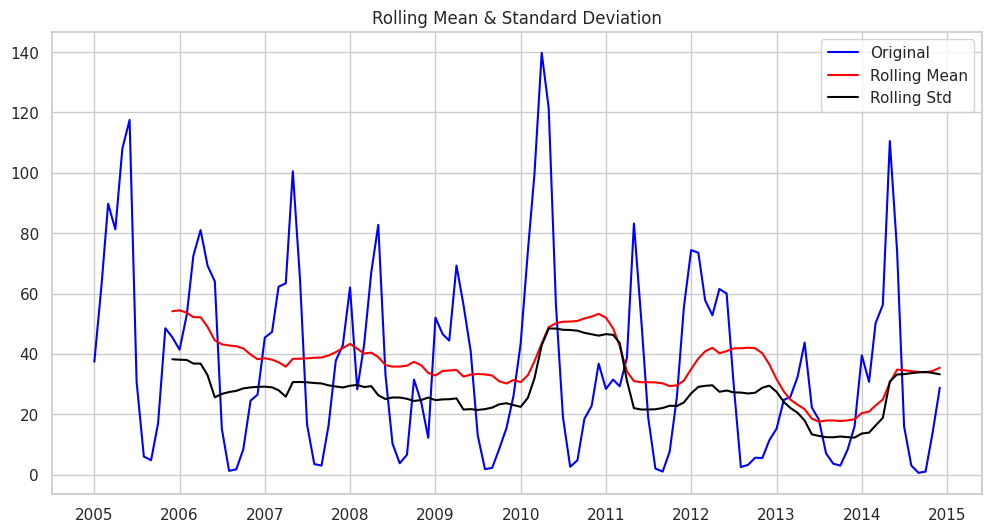

Results of Dickey-Fuller Test: 

Test Statistic                  -2.806121
p-value                          0.057405
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: BEKES


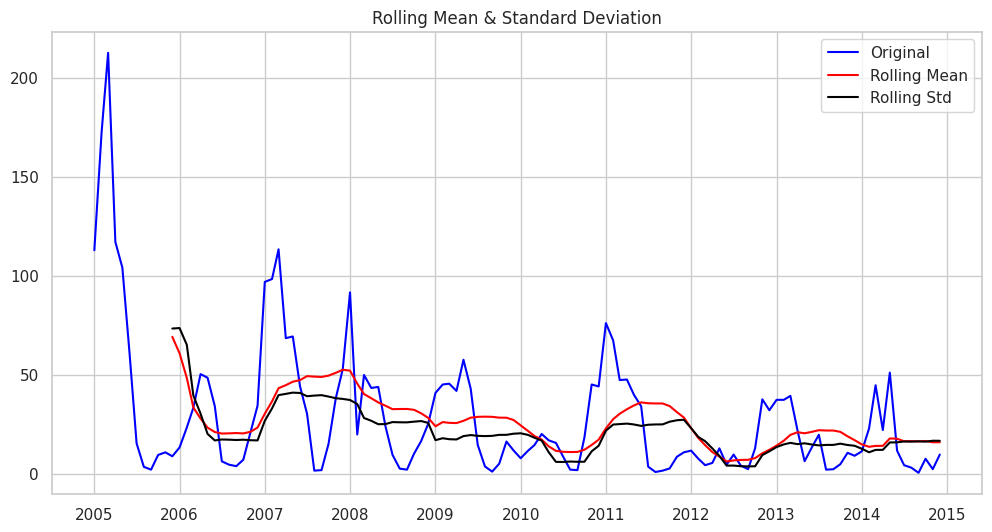

Results of Dickey-Fuller Test: 

Test Statistic                -8.445740e+00
p-value                        1.714830e-13
#Lags Used                     2.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64

Checking stationarity for column: BORSOD


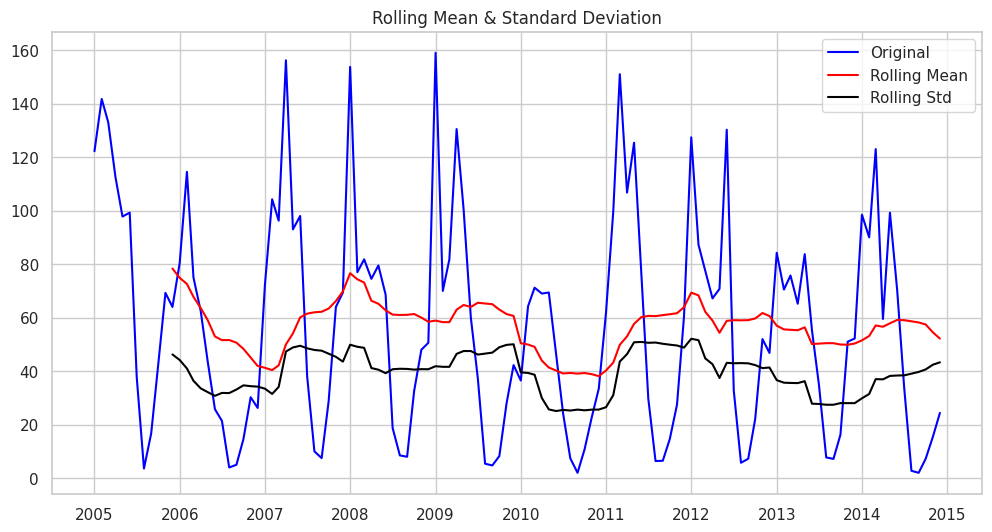

Results of Dickey-Fuller Test: 

Test Statistic                -8.275761e+00
p-value                        4.661423e-13
#Lags Used                     5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64

Checking stationarity for column: CSONGRAD


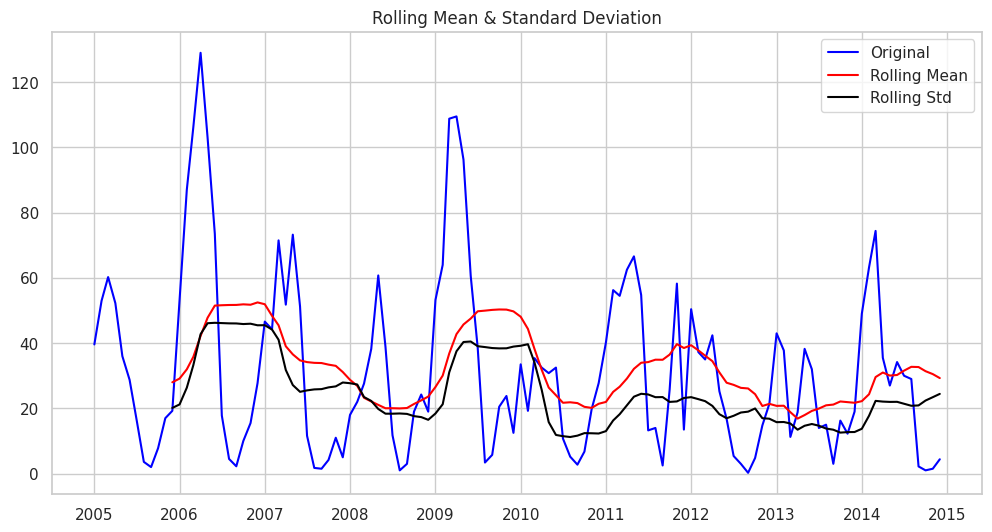

Results of Dickey-Fuller Test: 

Test Statistic                  -2.809682
p-value                          0.056904
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: FEJER


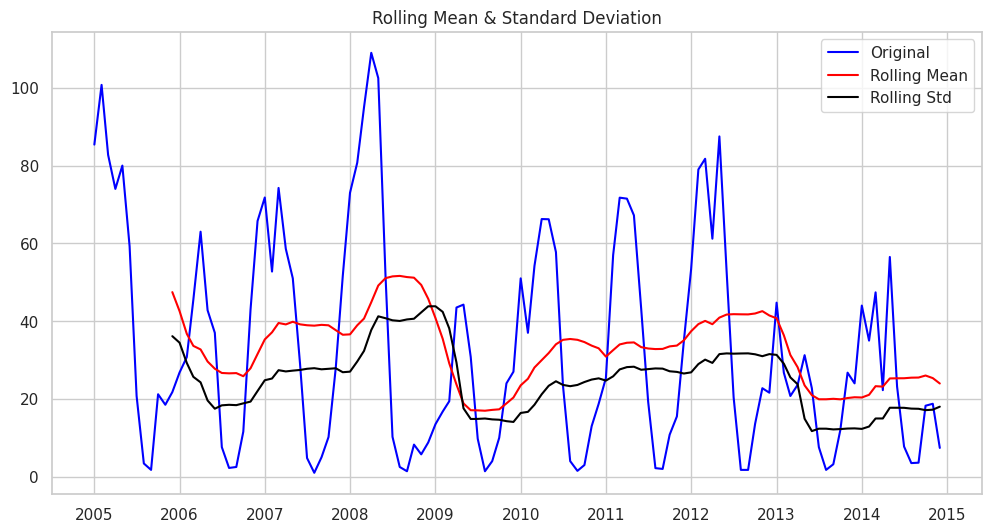

Results of Dickey-Fuller Test: 

Test Statistic                  -2.924263
p-value                          0.042598
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: GYOR


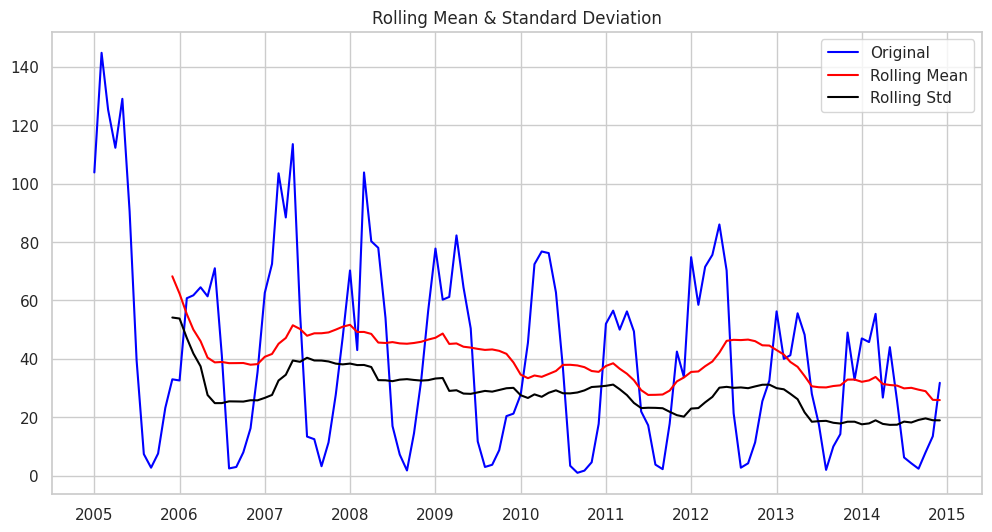

Results of Dickey-Fuller Test: 

Test Statistic                  -2.084972
p-value                          0.250600
#Lags Used                      13.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64

Checking stationarity for column: HAJDU


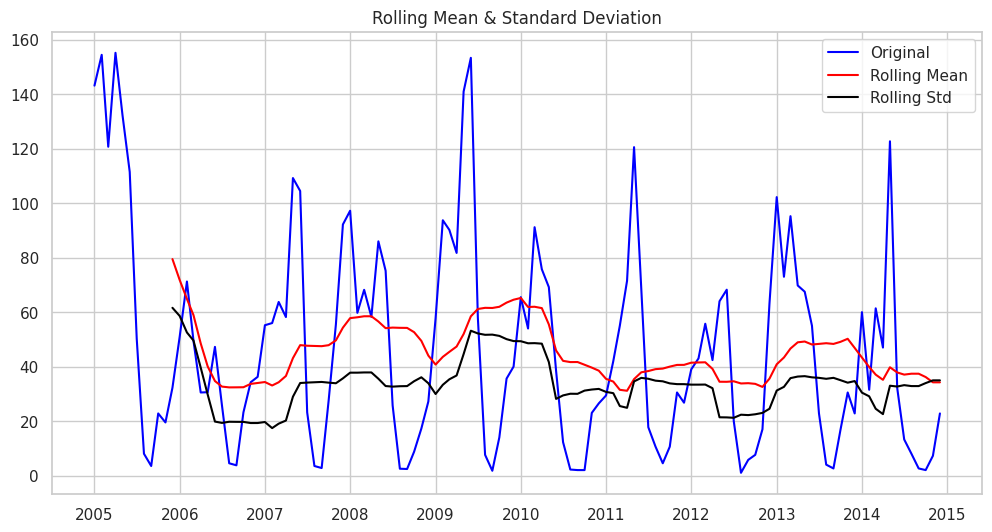

Results of Dickey-Fuller Test: 

Test Statistic                  -3.041217
p-value                          0.031220
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: HEVES


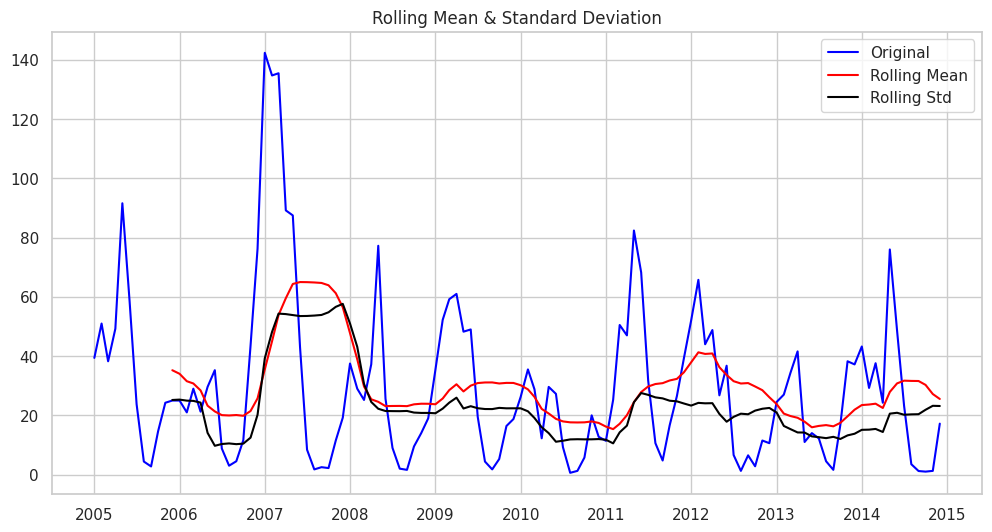

Results of Dickey-Fuller Test: 

Test Statistic                -5.673417e+00
p-value                        8.815532e-07
#Lags Used                     2.000000e+00
Number of Observations Used    1.170000e+02
Critical Value (1%)           -3.487517e+00
Critical Value (5%)           -2.886578e+00
Critical Value (10%)          -2.580124e+00
dtype: float64

Checking stationarity for column: JASZ


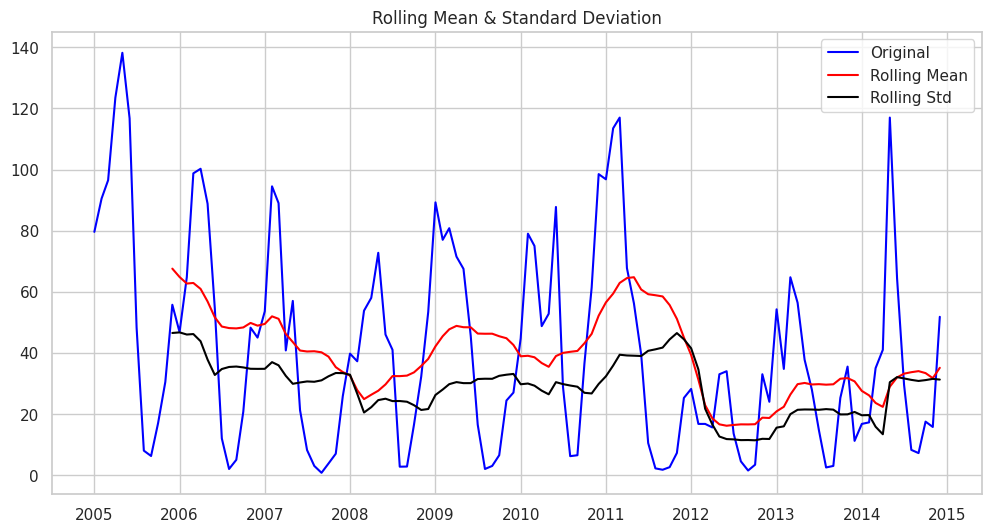

Results of Dickey-Fuller Test: 

Test Statistic                -6.555335e+00
p-value                        8.645014e-09
#Lags Used                     4.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64

Checking stationarity for column: KOMAROM


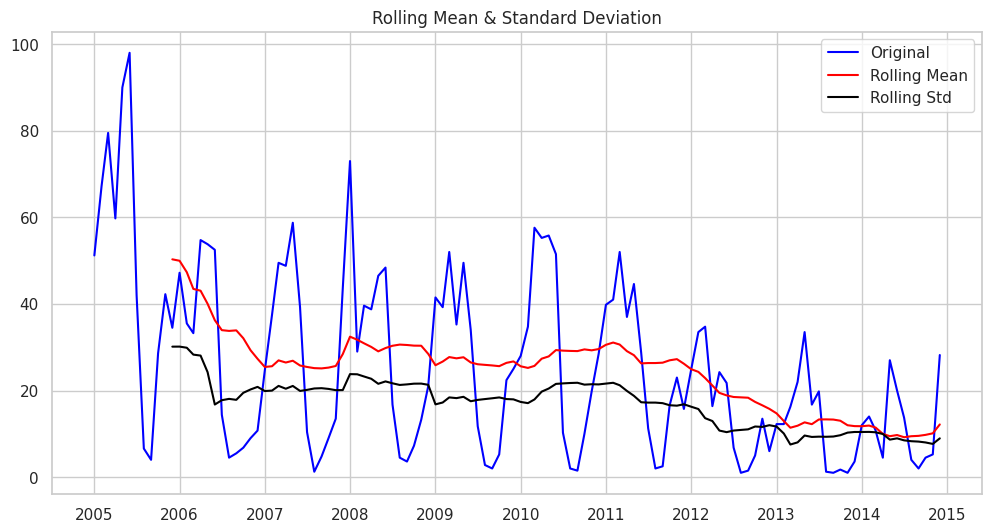

Results of Dickey-Fuller Test: 

Test Statistic                  -2.435062
p-value                          0.132084
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: NOGRAD


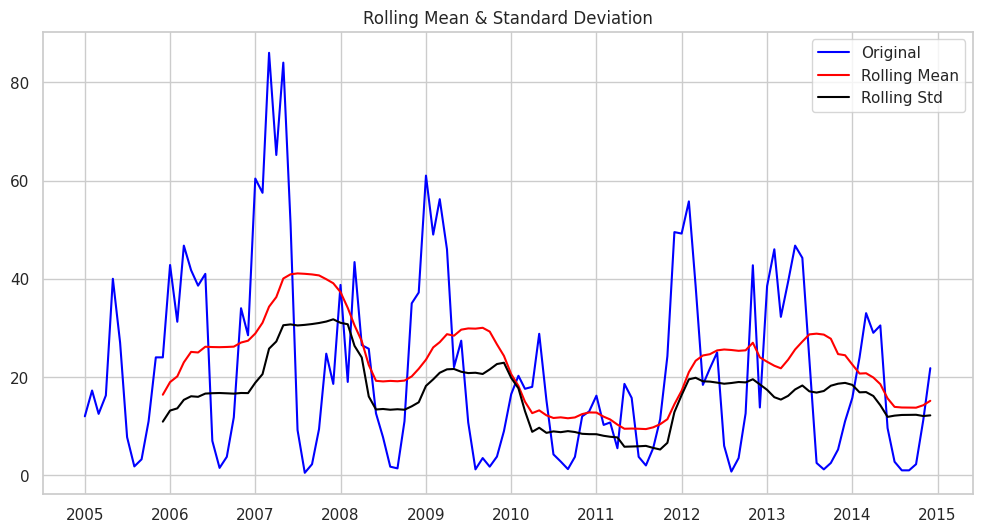

Results of Dickey-Fuller Test: 

Test Statistic                  -2.569375
p-value                          0.099493
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: PEST


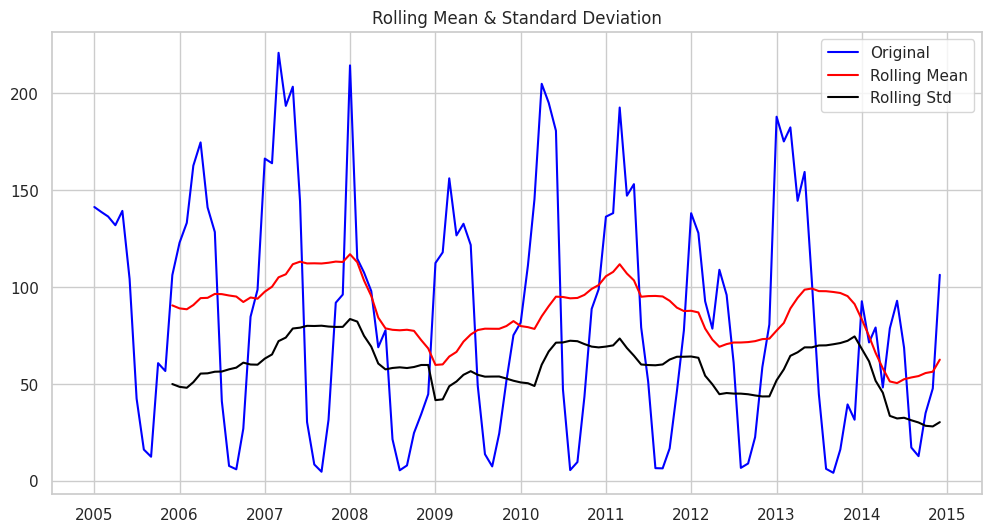

Results of Dickey-Fuller Test: 

Test Statistic                  -2.421780
p-value                          0.135683
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64

Checking stationarity for column: SOMOGY


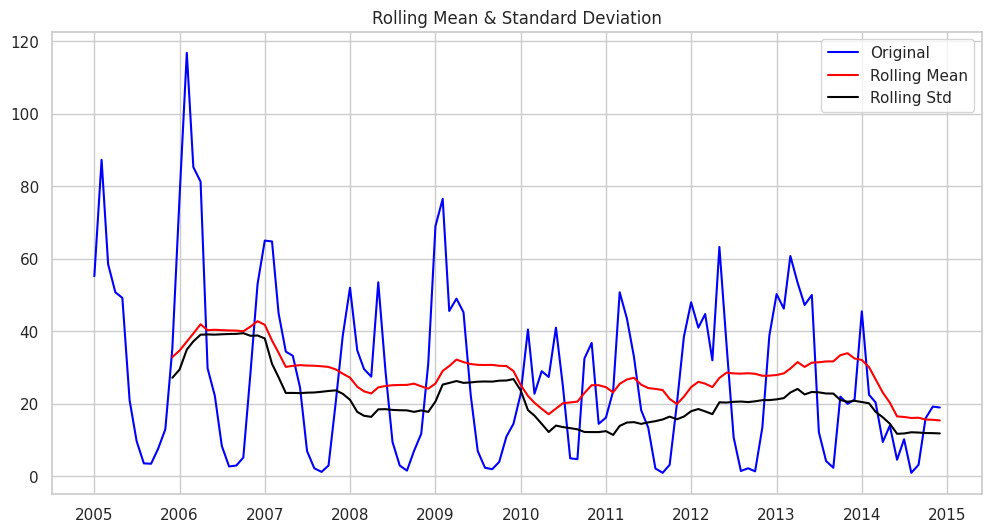

Results of Dickey-Fuller Test: 

Test Statistic                -7.002801e+00
p-value                        7.248808e-10
#Lags Used                     5.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64

Checking stationarity for column: SZABOLCS


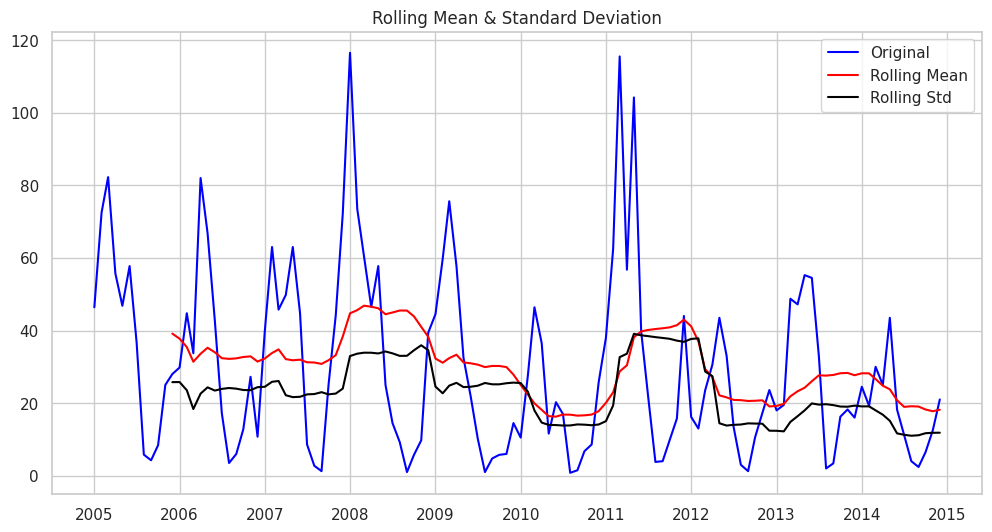

Results of Dickey-Fuller Test: 

Test Statistic                -6.320528e+00
p-value                        3.074148e-08
#Lags Used                     3.000000e+00
Number of Observations Used    1.160000e+02
Critical Value (1%)           -3.488022e+00
Critical Value (5%)           -2.886797e+00
Critical Value (10%)          -2.580241e+00
dtype: float64

Checking stationarity for column: TOLNA


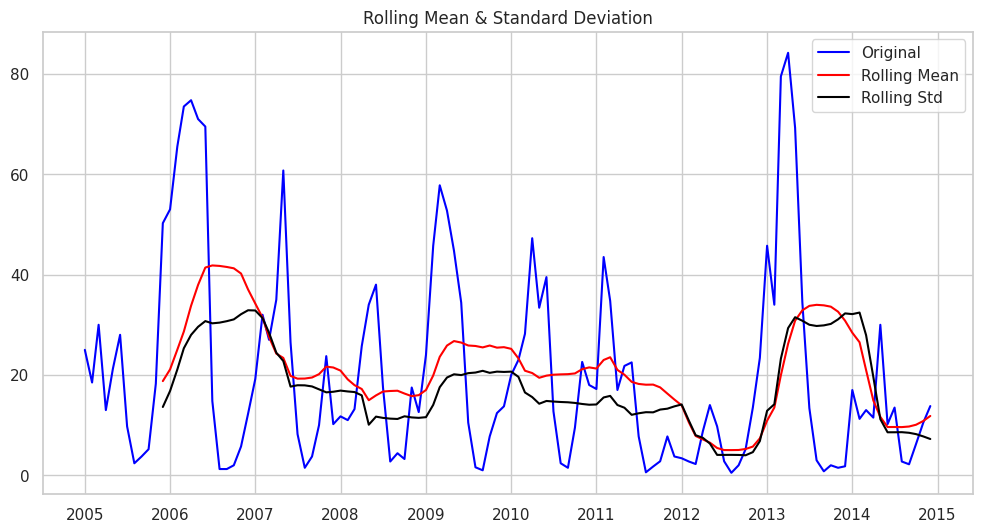

Results of Dickey-Fuller Test: 

Test Statistic                  -5.361079
p-value                          0.000004
#Lags Used                       2.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64

Checking stationarity for column: VAS


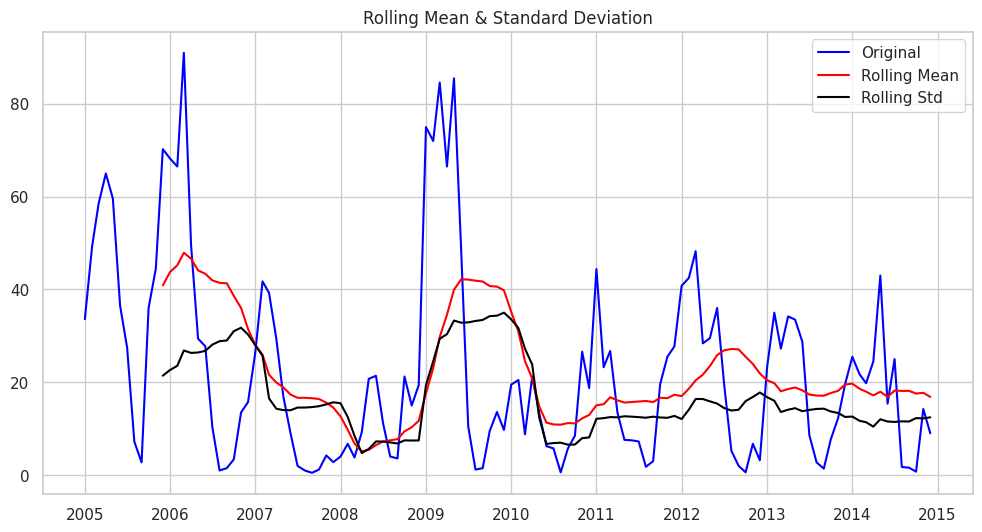

Results of Dickey-Fuller Test: 

Test Statistic                  -2.423996
p-value                          0.135078
#Lags Used                       7.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64

Checking stationarity for column: VESZPREM


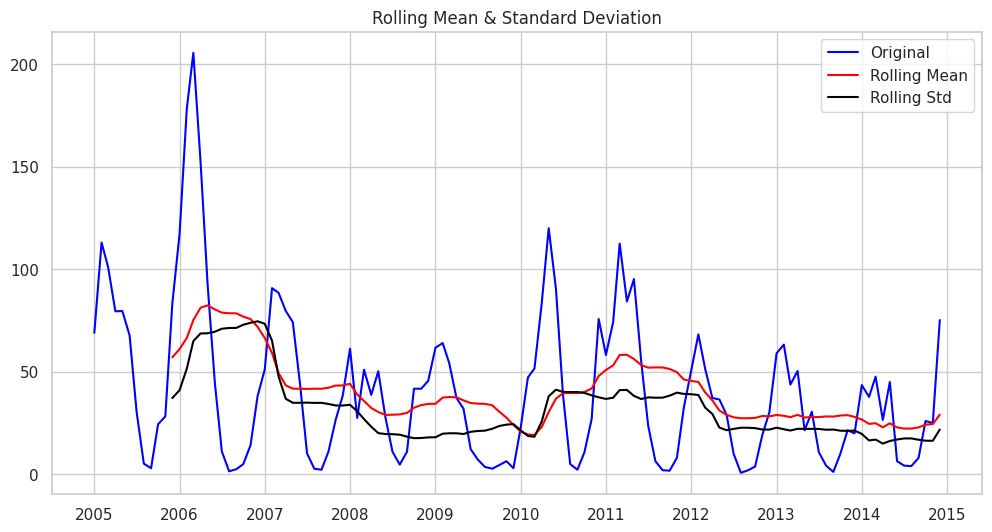

Results of Dickey-Fuller Test: 

Test Statistic                  -2.325385
p-value                          0.163912
#Lags Used                       8.000000
Number of Observations Used    111.000000
Critical Value (1%)             -3.490683
Critical Value (5%)             -2.887952
Critical Value (10%)            -2.580857
dtype: float64

Checking stationarity for column: ZALA


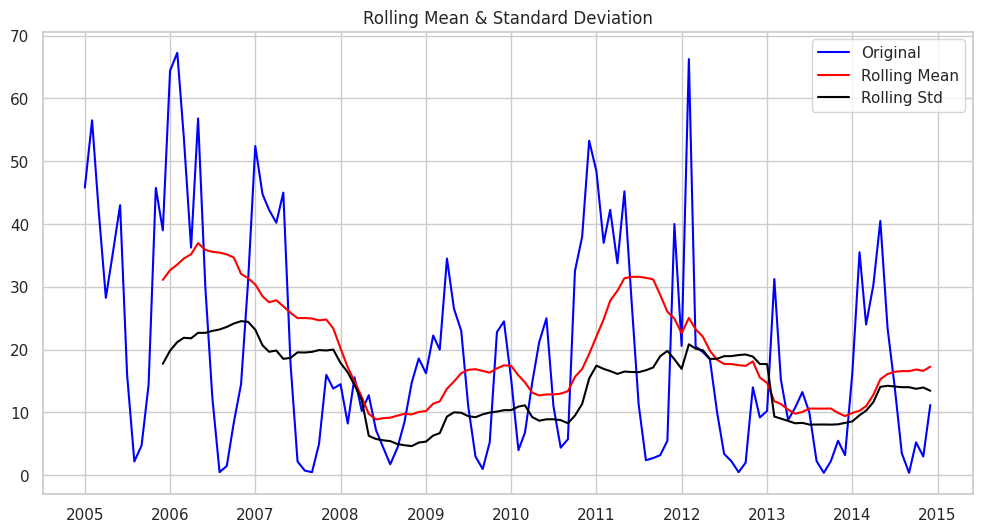

Results of Dickey-Fuller Test: 

Test Statistic                  -2.467671
p-value                          0.123540
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64



In [91]:
verdict_dict = {}
for column in temporal_monthly_mean.columns:
    print(f"Checking stationarity for column: {column}")
    verdict = stationarity_check(temporal_monthly_mean[column], w=12)
    verdict_dict[column] = verdict

In [93]:
# Overall verdicts
verdict_dict

{'BUDAPEST': 'The data is non-stationary',
 'BARANYA': 'The data is non-stationary',
 'BACS': 'The data is non-stationary',
 'BEKES': 'The data is non-stationary',
 'BORSOD': 'The data is non-stationary',
 'CSONGRAD': 'The data is non-stationary',
 'FEJER': 'The data is non-stationary',
 'GYOR': 'The data is non-stationary',
 'HAJDU': 'The data is non-stationary',
 'HEVES': 'The data is non-stationary',
 'JASZ': 'The data is non-stationary',
 'KOMAROM': 'The data is non-stationary',
 'NOGRAD': 'The data is non-stationary',
 'PEST': 'The data is non-stationary',
 'SOMOGY': 'The data is non-stationary',
 'SZABOLCS': 'The data is non-stationary',
 'TOLNA': 'The data is non-stationary',
 'VAS': 'The data is non-stationary',
 'VESZPREM': 'The data is non-stationary',
 'ZALA': 'The data is non-stationary'}

In [95]:
stationary = []
non_stationary = []
# Looping through each of the verdicts
for key, val in verdict_dict.items():
    
    # stationary columns
    if val == 'The data is stationary':
        stationary.append(key)
     
    # Non-stationary columns    
    else:
        non_stationary.append(key)
        
        
# Preview
print(f"Counties that have stationary data: {stationary} totalling to {len(stationary)} counties of the {len(verdict_dict)} ")
print(f"Counties that have non-stationary data: {non_stationary} totalling to {len(non_stationary)} counties of the {len(verdict_dict)}")

Counties that have stationary data: [] totalling to 0 counties of the 20 
Counties that have non-stationary data: ['BUDAPEST', 'BARANYA', 'BACS', 'BEKES', 'BORSOD', 'CSONGRAD', 'FEJER', 'GYOR', 'HAJDU', 'HEVES', 'JASZ', 'KOMAROM', 'NOGRAD', 'PEST', 'SOMOGY', 'SZABOLCS', 'TOLNA', 'VAS', 'VESZPREM', 'ZALA'] totalling to 20 counties of the 20


The counties that are non-stationary first have to be made stationary for them to undergo data modelling.

### National Total
> Performing a time series analysis on the national figures

In [96]:
# Creating a new variable for national tallies
nation_df = chickenpox_df[['Date', 'National_Total']]

# setting date as the index for the time series
nation_df = index_date(nation_df)

# preview
nation_df.head()

National_Total
Date                      
2005-01-03            1807
2005-01-10            1407
2005-01-17            1284
2005-01-24            1255
2005-01-31            1478

In [97]:
# Sampling the national total to monthly data
nation_monthly = nation_df.resample('MS')


# Getting the mean case count for the month
nation_monthly_mean = nation_monthly.mean()

# Preview
nation_monthly_mean.head()

National_Total
Date                      
2005-01-01         1446.20
2005-02-01         1816.75
2005-03-01         1752.25
2005-04-01         1564.50
2005-05-01         1682.20

### Stationarity Check for the National Total

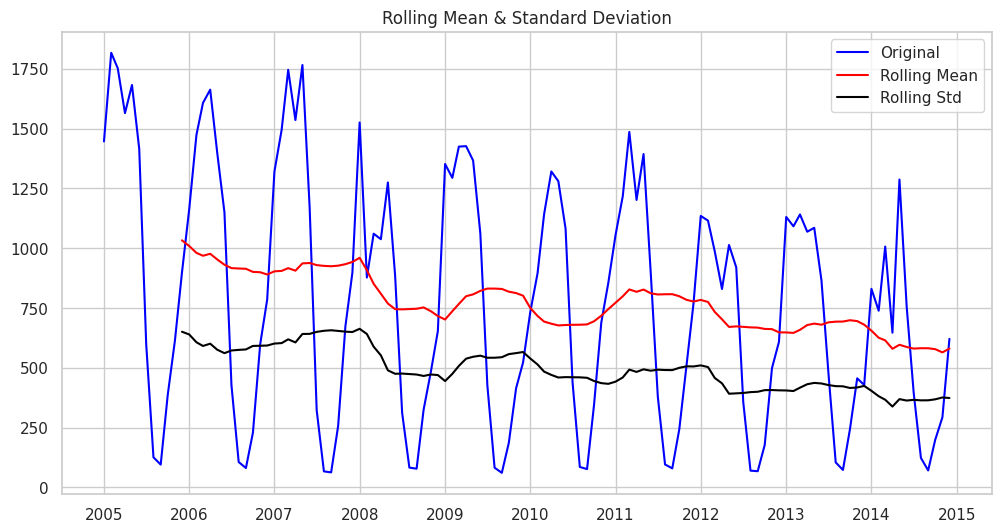

Results of Dickey-Fuller Test: 

Test Statistic                  -1.469722
p-value                          0.548433
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64



'The data is non-stationary'

In [98]:
stationarity_check(nation_monthly_mean, w=12)

# Data Modelling

## Using SARIMAX

In [47]:
# Train_test_split
train_data = temporal_df.loc['2005-01-01':'2013-12-31']
test_data = temporal_df.loc['2014-01-01':'2015-12-31']

In [48]:
test_data

BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
Date                                                                        
2014-01-06       150       49     4      4     205        48     47    81   
2014-01-13        80       50    41      4      73        69     61    59   
2014-01-20        82       19    72     13      40        12     44    14   
2014-01-27        58       24    41     24      76        67     24    34   
2014-02-03        84       43    14     14      66        47     28     9   
2014-02-10        59       31     1     26      76        77     18    66   
2014-02-17        60       29    72     21     114        73     71    56   
2014-02-24       116       40    36     30     104        56     23    52   
2014-03-03        99       53    51     41     103        61     78    52   
2014-03-10       112       48    77     20     121         1     25    55   
2014-03-17       197       49    21     50     134       112     34    85   
2014-03-24       116       60    34     58     185        54     54    50   
2014-03-31       215       51    68     54      72       144     46    35   
2014-04-07        82       21   157     26     109        61     41    62   
2014-04-14       155       31    38     56     107        57     47    15   
2014-04-21        80       21    25      6      22        21      1    23   
2014-04-28        13       10     5      0       0         3      0     7   
2014-05-05        70       67    40     59      76        44     88    34   
2014-05-12       391       35   274     62     109        20     42    87   
2014-05-19       178       23    48      9     133        30     22    14   
2014-05-26       124       35    80     74      79        14     74    41   
2014-06-02       235       17    85     27     158        72     20    33   
2014-06-09        88        4     0      8      17        29      7    37   
2014-06-16       187       27   177     11      63        35     60    21   
2014-06-23       140       20    84      8     106         4     14     9   
2014-06-30       111       19    25      4       7        31     15    28   
2014-07-07        72       27    17      5      81         8     16     7   
2014-07-14        75        4    25      3      14        17     11     5   
2014-07-21        44        7    10      2      18         2      1     7   
2014-07-28        40        0    12      7      22        93      3     6   
2014-08-04        37        5     8      0       7        57      4     4   
2014-08-11        10        2     2      4       3        25      3     5   
2014-08-18         6        4     1      1       0        34      6     3   
2014-08-25         7        3     1      7       1         0      1     5   
2014-09-01         5        0     0      0       1         1      3     0   
2014-09-08        10        2     0      0       3         0      3     1   
2014-09-15        11        4     0      1       1         0      2     3   
2014-09-22        16        4     1      1       2         7      3     5   
2014-09-29        20        4     2      0       3         3      7     3   
2014-10-06        17       10     0      1       3         1     18     1   
2014-10-13        21        1     0      1       4         0     20    17   
2014-10-20        34       12     3     26       9         1     22     3   
2014-10-27        28        7     1      2      13         2     13    11   
2014-11-03        44        4     7      0      16         0     18    11   
2014-11-10        33        5    10      0      29         3     20     7   
2014-11-17        85       15    26      7      14         3     28    13   
2014-11-24        16       15    14      2       3         0      9    23   
2014-12-01        95       12    41      6      39         0     16    15   
2014-12-08        43       39    31     10      34         3      2    30   
2014-12-15        35        7    15      0       0         0      7     7   
2014-12-

In [49]:
train_data

BUDAPEST  BARANYA  BACS  BEKES  BORSOD  CSONGRAD  FEJER  GYOR  \
Date                                                                        
2005-01-03       168       79    30    173     169        42    136   120   
2005-01-10       157       60    30     92     200        53     51    70   
2005-01-17        96       44    31     86      93        30     93    84   
2005-01-24       163       49    43    126      46        39     52   114   
2005-01-31       122       78    53     87     103        34     95   131   
...              ...      ...   ...    ...     ...       ...    ...   ...   
2013-12-02       101       20    14     10      44        20      7    39   
2013-12-09        63       30    30     11      81        16     38    40   
2013-12-16        59       44    35     23      84        59     37    42   
2013-12-23         6        3     0      0       3         0      1     0   
2013-12-30        26       27     1      1      49         0     37    43   

            HAJDU  HEVES  JASZ  KOMAROM  NOGRAD  PEST  SOMOGY  SZABOLCS  \
Date                                                                      
2005-01-03    162     36   130       57       2   178      66        64   
2005-01-10     84     28    80       50      29   141      48        29   
2005-01-17    191     51    64       46       4   157      33        33   
2005-01-24    107     42    63       54      14   107      66        50   
2005-01-31    172     40    61       49      11   124      63        56   
...           ...    ...   ...      ...     ...   ...     ...       ...   
2013-12-02     26     64    22        3      14    35      63        14   
2013-12-09     37     21    12       11       6    29       5        18   
2013-12-16     19     82     4        2      22    54      17        19   
2013-12-23      3      1     0        0       0    10       0         3   
2013-12-30     29     18    18        2      13    30      21        26   

            TOLNA  VAS  VESZPREM  ZALA  
Date                                    
2005-01-03     11   29        87    68  
2005-01-10     58   53        68    26  
2005-01-17     24   18        62    44  
2005-01-24     25   21        43    31  
2005-01-31      7   47        85    60  
...           ...  ...       ...   ...  
2013-12-02      4   15        25     3  
2013-12-09      0   44        11     2  
2013-12-16      1   19        39     4  
2013-12-23      4    0         2     2  
2013-12-30      0   20        23     5  

[470 rows x 20 columns]

In [50]:
# creating an object of xgboostregressor

In [54]:
data = temporal_df.sort_values('Date')

In [56]:
split_index = int(len(data) * 0.7)

In [58]:
fake_train = data.loc[:split_index]

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [365] of type int